In [1]:
!rm -rf /Users/tash/Library/Caches/scikit-image/0.18.1/data/README.txt

In [3]:
# Import libraries and modules
%config InlineBackend.figure_format = 'svg'
%matplotlib widget
# %matplotlib inline
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
from matplotlib.pylab import rcParams
import matplotlib.image as mpimg
from matplotlib import pyplot
# from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import title, show,colorbar,imshow
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
# import pysal
sns.set_style('ticks')
rcParams['figure.figsize'] = 8, 4
rcParams['figure.frameon'] = True
import csv
from datetime import datetime,timedelta
import os.path
import os
import sys
import time
import glob
import gzip
from setuptools import archive_util
from collections import OrderedDict
import shutil
from shutil import copyfile
import subprocess
from PIL import Image
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from cycler import cycler
import netCDF4
import math
import cmath
import collections  #for additional dictionary functionality
from matplotlib.gridspec import GridSpec #for subplots
import scipy.signal as signal #for signal processing
import xarray as xr
import scipy.signal as sig
# import regionmask
import calendar
from pyhdf.SD import SD, SDC
import pyproj
import cmocean
# need to add 'numba' in nix shell default
from netCDF4 import Dataset
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.io.shapereader import Reader
import geopandas as gpd

import io, os, sys, types
# from IPython import get_ipython
# from nbformat import read
# from IPython.core.interactiveshell import InteractiveShell
from astropy.time import Time
from astropy.time import TimeDelta as ATimeDelta

import scipy
import scipy.io as spio
from netCDF4 import Dataset
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.gridspec as gridspec
import statsmodels.formula.api as sm
import numpy.ma as ma
from scipy.ndimage.filters import gaussian_filter
from skimage import exposure
from geographiclib.geodesic import Geodesic

import warnings
warnings.filterwarnings('ignore')

In [4]:
def get_file_in_directory(path): 
    "Retrieves file names from a directory \
    \n\nInput: path = directory \
    \n\nOutput: list of subdirectories"

    return [name for name in os.listdir(path)
            if os.path.isfile(os.path.join(path, name))]

def julian_day_from_date(year, month, day): 
    "Convert date (year,mo,dy) to julian DOY of that day. \
    \n***Altered from SearchMODISDownload by Mike MacFerrin*** \
    \n\nOutput: julian day"
    
    d = dt.date(year, month, day)
    tt = d.timetuple()
    return tt.tm_yday

def date_from_julian_date(yrj):
    d = datetime.strptime(yrj, '%Y%j').date()
    return d

def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [5]:
#For color cycling in plots that is color blind friendly...make new ones at "I want hue" tools.medialab.sciences-po.fr/iwanthue
color_cycler = cycler(color=["#6777cf","#adba49","#c65ca0","#5fa042","#683287","#72ce7b","#c44a48","#45c7a9","#933c1d","#d0803f","#ac9239","#317c39"])
colorline_cycler = (cycler(color=["#75a141","#6c61b9","#bc4d45","#c1913d","#b85298","#4aa8e8"]) +
                 cycler(linestyle=['-','--',':','-.','-','--']))
rcParams['axes.prop_cycle'] = cycler('color', color_cycler)

In [4]:
# Shelf mooring data
# 150m

moor_dir = '/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/Data/Helheim_Data/'

# 2009 - 2010 @ 155m     
file_shelf150 = moor_dir + '0127320/1.1/data/1-data/GP09_CM5_TidbiT_155.nc'
shelf150 = Dataset(file_shelf150, mode='r')
time_shelf150 = shelf150.variables['time'][:]
start_shelf150 = shelf150.time_coverage_start
end_shelf150 = shelf150.time_coverage_end
temp_shelf150 = shelf150.variables['temperature'][:]
temp_qc_shelf150 = shelf150.variables['temperature_qc'][:]
temp_shelf150 = ma.masked_where(temp_qc_shelf150==1,temp_shelf150)
print (start_shelf150)
print (end_shelf150)
data09shelf150 = pd.DataFrame(temp_shelf150,columns=['Tempshelf150m'])
data09shelf150['Datetime'] = pd.date_range(start_shelf150, end_shelf150, freq="30min")
data09shelf150 = data09shelf150.set_index('Datetime')
data09shelf150 = data09shelf150.resample("H").mean()
data09shelf150.head()

# 2010 - 2011 @ 155m     
file_shelf150 = moor_dir + '0123282/2.2/data/1-data/SF10_CM5_TidbiT_155.nc'
shelf150 = Dataset(file_shelf150, mode='r')
time_shelf150 = shelf150.variables['time'][:]
start_shelf150 = shelf150.time_coverage_start
end_shelf150 = shelf150.time_coverage_end
temp_shelf150 = shelf150.variables['temperature'][:]
temp_qc_shelf150 = shelf150.variables['temperature_qc'][:]
temp_shelf150 = ma.masked_where(temp_qc_shelf150==1,temp_shelf150)
print (start_shelf150)
print (end_shelf150)
data10shelf150 = pd.DataFrame(temp_shelf150,columns=['Tempshelf150m'])
data10shelf150['Datetime'] = pd.date_range(start_shelf150, end_shelf150, freq="10min")
data10shelf150 = data10shelf150.set_index('Datetime')
data10shelf150 = data10shelf150.resample("H").mean()
data10shelf150.head()

all_shelf150 = pd.concat([data10shelf150,data09shelf150],axis=0)
all_shelf150.index = pd.to_datetime(all_shelf150.index)
all_shelf150.head()

# 290m

# 2009 - 2010 @ 294m     
file_shelf290 = moor_dir + '0127320/1.1/data/1-data/GP09_CM6_mc_294.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data09shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data09shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="15min")
data09shelf290 = data09shelf290.set_index('Datetime')
data09shelf290 = data09shelf290.resample("H").mean()
data09shelf290.head()

# 2010 - 2011 @ 262m     
file_shelf290 = moor_dir + '0123282/2.2/data/1-data/SF10_CM5_mc_262.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data10shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data10shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="10min")
data10shelf290 = data10shelf290.set_index('Datetime')
data10shelf290 = data10shelf290.resample("H").mean()
data10shelf290.head()

# 2011 - 2012 @ 305m     #Close to N bank
file_shelf290 = moor_dir + '0126772/2.2/data/1-data/SF11_OE1_XR420_305.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data11shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data11shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="10min")
data11shelf290 = data11shelf290.set_index('Datetime')
data11shelf290 = data11shelf290.resample("H").mean()
data11shelf290.head()

# 2012 - 2013 @ 285m     
file_shelf290 = moor_dir + '0127325/1.1/data/1-data/SF12_CM5_mc_285.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data12shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data12shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="450S")
data12shelf290 = data12shelf290.set_index('Datetime')
data12shelf290 = data12shelf290.resample("H").mean()
data12shelf290.head()

all_shelf290 = pd.concat([data09shelf290,data10shelf290,data11shelf290,data12shelf290],axis=0) 
all_shelf290.index = pd.to_datetime(all_shelf290.index)
all_shelf290.head()


# 550m

# 2010 - 2011 @ 505m     Mouth
file_shelf550 = moor_dir + '0123282/2.2/data/1-data/SF10_SF4_mc_505.nc'
shelf550 = Dataset(file_shelf550, mode='r')
time_shelf550 = shelf550.variables['time'][:]
start_shelf550 = shelf550.time_coverage_start
end_shelf550 = shelf550.time_coverage_end
cond_shelf550 = shelf550.variables['conductivity'][:]
cond_qc_shelf550 = shelf550.variables['conductivity_qc'][:]
temp_shelf550 = shelf550.variables['temperature'][:]
temp_qc_shelf550 = shelf550.variables['temperature_qc'][:]
cond_shelf550 = ma.masked_where(cond_qc_shelf550==1,cond_shelf550)
temp_shelf550 = ma.masked_where(temp_qc_shelf550==1,temp_shelf550)
print (start_shelf550)
print (end_shelf550)
data10shelf550 = pd.concat([pd.DataFrame(temp_shelf550,columns=['Tempshelf550m']),pd.DataFrame(cond_shelf550,columns=['Condshelf550m'])], axis=1)
data10shelf550['Datetime'] = pd.date_range(start_shelf550, end_shelf550, freq="10min")
data10shelf550 = data10shelf550.set_index('Datetime')
data10shelf550 = data10shelf550.resample("6H").mean()
data10shelf550.head()

all_shelf550 = pd.concat([data10shelf550],axis=0)
all_shelf550.index = pd.to_datetime(all_shelf550.index)
all_shelf550.head()

all_shelf150 = all_shelf150.loc[~all_shelf150.index.duplicated(keep='first')]  # make sure no duplicates of dates
all_shelf290 = all_shelf290.loc[~all_shelf290.index.duplicated(keep='first')] 
all_shelf550 = all_shelf550.loc[~all_shelf550.index.duplicated(keep='first')] 


# Concatenate all mooring data
all_shelfmoorH = pd.concat([all_shelf150,all_shelf550,all_shelf290],axis=1)   
all_shelfmoorH = all_shelfmoorH.loc[~all_shelfmoorH.index.duplicated(keep='first')] 
all_shelfmoorH = all_shelfmoorH.tz_convert(None)
all_shelfmoorH = all_shelfmoorH.resample("6H").mean()
all_shelfmoorD = all_shelfmoorH.resample("D").mean()
all_shelfmoorH.head(4)

24-Aug-2009 21:30:00 UTC
22-Aug-2010 11:00:00 UTC
22-Aug-2010 18:40:00 UTC
20-Jun-2011 08:20:00 UTC
24-Aug-2009 22:30:08 UTC
22-Aug-2010 13:30:08 UTC
22-Aug-2010 19:00:00 UTC
15-Aug-2011 18:20:01 UTC
24-Aug-2011 17:30:00 UTC
15-Sep-2012 10:50:00 UTC
20-Sep-2012 11:37:31 UTC
18-Aug-2013 17:00:01 UTC
28-Aug-2010 15:00:01 UTC
15-Aug-2011 21:50:01 UTC


,Tempshelf150m,Tempshelf550m,Condshelf550m,Tempshelf290m,Condshelf290m
Datetime,,,,,
2009-08-24 18:00:00,1.201833,NaN,NaN,2.339912,3.075698
2009-08-25 00:00:00,0.502333,NaN,NaN,2.201892,3.063179
2009-08-25 06:00:00,0.691167,NaN,NaN,1.772681,3.018460
2009-08-25 12:00:00,2.036500,NaN,NaN,1.867954,3.027672


In [5]:
# Fjord mooring data
# 125m

# 2008 - 2009 @ 180m    
file_mid125 = moor_dir + '0123217/3.3/data/1-data/SF08S_MD_mc_180.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data08mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data08mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="30min")
data08mid125 = data08mid125.set_index('Datetime')
data08mid125.head()

# 2009 - 2010 @ 120m    
file_mid125 = moor_dir + '0127320/1.1/data/1-data/GP09_CM1_mc_120.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data09mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data09mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="15min")
data09mid125 = data09mid125.set_index('Datetime')
data09mid125.tail()

# 2010 - 2011 @ 131m    
file_mid125 = moor_dir + '0123282/2.2/data/1-data/SF10_CM1SF5_mc_131.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data10mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data10mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="10min")
data10mid125 = data10mid125.set_index('Datetime')
data10mid125.head()

# 2011 - 2012 @ 125m    
file_mid125 = moor_dir + '0126772/2.2/data/1-data/SF11_CM1SF5_mc_125.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data11mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data11mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="450S")
data11mid125 = data11mid125.set_index('Datetime')
data11mid125.head()

# 2012 - 2013 @ 125m    Two records from same location, chose the less variable one
# file_mid125 = '/Users/tsnow03/GoogleDrive/User/Docs/PhD_Project/Data/Helheim_Data/0127325/1.1/data/1-data/SF12_CM0_mc_125.nc'
file_mid125 = moor_dir + '0127325/1.1/data/1-data/SF12_CM1_mc_125.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data12mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data12mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="450S")
data12mid125 = data12mid125.set_index('Datetime')
data12mid125.head()

all_mid125 = pd.concat([data08mid125,data09mid125,data10mid125,data11mid125,data12mid125],axis=0,sort=True) #2009 hasn't been included data09mid125,
all_mid125.index = pd.to_datetime(all_mid125.index)
all_mid125.index

# 250m

# 2010 - 2011 @ 250m Nearer to mouth of fjord  or 294m mid fjord
# file_mid250 = moor_dir + '0123282/2.2/data/1-data/SF10_SF4_mc_250.nc'
# mid250 = Dataset(file_mid250, mode='r')
# time_mid250 = mid250.variables['time'][:]
# start_mid250 = mid250.time_coverage_start
# end_mid250 = mid250.time_coverage_end
# cond_mid250 = mid250.variables['conductivity'][:]
# cond_qc_mid250 = mid250.variables['conductivity_qc'][:]
# temp_mid250 = mid250.variables['temperature'][:]
# temp_qc_mid250 = mid250.variables['temperature_qc'][:]
# cond_mid250 = ma.masked_where(cond_qc_mid250==1,cond_mid250)
# temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
# print (start_mid250)
# print (end_mid250)
# data10mid250 = pd.concat([pd.DataFrame(temp_mid250,columns=['Tempmid250m']),pd.DataFrame(cond_mid250,columns=['Condmid250m'])], axis=1)
# data10mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="10min")
# data10mid250 = data10mid250.set_index('Datetime')
# # data10mid250 = data10mid250.groupby(data10mid250.index.date).mean()

file_mid250 = moor_dir + '0123282/2.2/data/1-data/SF10_CM2SF6_TidbiT_294.nc'
mid250 = Dataset(file_mid250, mode='r')
time_mid250 = mid250.variables['time'][:]
start_mid250 = mid250.time_coverage_start
end_mid250 = mid250.time_coverage_end
temp_mid250 = mid250.variables['temperature'][:]
temp_qc_mid250 = mid250.variables['temperature_qc'][:]
temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
print (start_mid250)
print (end_mid250)
data10mid250 = pd.DataFrame(temp_mid250,columns=['Tempmid250m'])
data10mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="10min")
data10mid250 = data10mid250.set_index('Datetime')
data10mid250.head()

# 2011 - 2012 @ 265m
file_mid250 = moor_dir + '0126772/2.2/data/1-data/SF11_CM2SF6_mc_265.nc'
mid250 = Dataset(file_mid250, mode='r')
time_mid250 = mid250.variables['time'][:]
start_mid250 = mid250.time_coverage_start
end_mid250 = mid250.time_coverage_end
cond_mid250 = mid250.variables['conductivity'][:]
cond_qc_mid250 = mid250.variables['conductivity_qc'][:]
temp_mid250 = mid250.variables['temperature'][:]
temp_qc_mid250 = mid250.variables['temperature_qc'][:]
cond_mid250 = ma.masked_where(cond_qc_mid250==1,cond_mid250)
temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
print (start_mid250)
print (end_mid250)
data11mid250 = pd.concat([pd.DataFrame(temp_mid250,columns=['Tempmid250m']),pd.DataFrame(cond_mid250,columns=['Condmid250m'])], axis=1,sort=True)
data11mid250 = data11mid250[0:-1]
data11mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="450S")
data11mid250 = data11mid250.set_index('Datetime')
data11mid250.head()

# 2012 - 2013 @ 250m    *Could switch to 290 tidbit like Fiamma does? But then no salinity
file_mid250 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_XR420_250.nc'
mid250 = Dataset(file_mid250, mode='r')
time_mid250 = mid250.variables['time'][:]
start_mid250 = mid250.time_coverage_start
end_mid250 = mid250.time_coverage_end
cond_mid250 = mid250.variables['conductivity'][:]
cond_qc_mid250 = mid250.variables['conductivity_qc'][:]
temp_mid250 = mid250.variables['temperature'][:]
temp_qc_mid250 = mid250.variables['temperature_qc'][:]
cond_mid250 = ma.masked_where(cond_qc_mid250==1,cond_mid250)
temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
print (start_mid250)
print (end_mid250)
data12mid250 = pd.concat([pd.DataFrame(temp_mid250,columns=['Tempmid250m']),pd.DataFrame(cond_mid250,columns=['Condmid250m'])], axis=1,sort=True)
data12mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="30min")
data12mid250 = data12mid250.set_index('Datetime')
data12mid250.head()

all_mid250 = pd.concat([data10mid250,data11mid250,data12mid250],axis=0)
all_mid250.index = pd.to_datetime(all_mid250.index)
all_mid250.head()



# 350m

# 2010 - 2011 @ 324m    Temp only
file_mid350 = moor_dir + '0123282/2.2/data/1-data/SF10_CM2SF6_TidbiT_324.nc'
mid350 = Dataset(file_mid350, mode='r')
time_mid350 = mid350.variables['time'][:]
start_mid350 = mid350.time_coverage_start
end_mid350 = mid350.time_coverage_end
temp_mid350 = mid350.variables['temperature'][:]
temp_qc_mid350 = mid350.variables['temperature_qc'][:]
temp_mid350 = ma.masked_where(temp_qc_mid350==1,temp_mid350)
print (start_mid350)
print (end_mid350)
data10mid350 = pd.DataFrame(temp_mid350,columns=['Tempmid350m'])
data10mid350['Datetime'] = pd.date_range(start_mid350, end_mid350, freq="10min")
data10mid350 = data10mid350.set_index('Datetime')
data10mid350.head()

# 2011 - 2012 @ 330m    Temp only
file_mid350 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_TidbiT_330.nc'
mid350 = Dataset(file_mid350, mode='r')
time_mid350 = mid350.variables['time'][:]
start_mid350 = mid350.time_coverage_start
end_mid350 = mid350.time_coverage_end
temp_mid350 = mid350.variables['temperature'][:]
temp_qc_mid350 = mid350.variables['temperature_qc'][:]
temp_mid350 = ma.masked_where(temp_qc_mid350==1,temp_mid350)
print (start_mid350)
print (end_mid350)
data11mid350 = pd.DataFrame(temp_mid350,columns=['Tempmid350m'])
data11mid350['Datetime'] = pd.date_range(start_mid350, end_mid350, freq="30min")
data11mid350 = data11mid350.set_index('Datetime')
data11mid350.head()

# 2012 - 2013 @ 350m
file_mid350 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_mc_350.nc'
mid350 = Dataset(file_mid350, mode='r')
time_mid350 = mid350.variables['time'][:]
start_mid350 = mid350.time_coverage_start
end_mid350 = mid350.time_coverage_end
cond_mid350 = mid350.variables['conductivity'][:]
cond_qc_mid350 = mid350.variables['conductivity_qc'][:]
temp_mid350 = mid350.variables['temperature'][:]
temp_qc_mid350 = mid350.variables['temperature_qc'][:]
cond_mid350 = ma.masked_where(cond_qc_mid350==1,cond_mid350)
temp_mid350 = ma.masked_where(temp_qc_mid350==1,temp_mid350)
print (start_mid350)
print (end_mid350)
data12mid350 = pd.concat([pd.DataFrame(temp_mid350,columns=['Tempmid350m']),pd.DataFrame(cond_mid350,columns=['Condmid350m'])], axis=1,sort=True)
data12mid350['Datetime'] = pd.date_range(start_mid350, end_mid350, freq="450S")
data12mid350 = data12mid350.set_index('Datetime')
data12mid350.head()

all_mid350 = pd.concat([data10mid350,data11mid350,data12mid350],axis=0)
all_mid350.index = pd.to_datetime(all_mid350.index)
all_mid350.head()


# 400m

# 2010 - 2011 @ 390m      Or optional 405m that is nearer to mouth
# file_mid400 = '/Users/tsnow03/GoogleDrive/User/Docs/PhD_Project/Data/Helheim_Data/0123282/2.2/data/1-data/SF10_SF4_mc_405.nc'
file_mid400 = moor_dir + '0123282/2.2/data/1-data/SF10_CM2SF6_mc_390.nc'
mid400 = Dataset(file_mid400, mode='r')
time_mid400 = mid400.variables['time'][:]
start_mid400 = mid400.time_coverage_start
end_mid400 = mid400.time_coverage_end
cond_mid400 = mid400.variables['conductivity'][:]
cond_qc_mid400 = mid400.variables['conductivity_qc'][:]
temp_mid400 = mid400.variables['temperature'][:]
temp_qc_mid400 = mid400.variables['temperature_qc'][:]
cond_mid400 = ma.masked_where(cond_qc_mid400==1,cond_mid400)
temp_mid400 = ma.masked_where(temp_qc_mid400==1,temp_mid400)
print (start_mid400)
print (end_mid400)
data10mid400 = pd.concat([pd.DataFrame(temp_mid400,columns=['Tempmid400m']),pd.DataFrame(cond_mid400,columns=['Condmid400m'])], axis=1,sort=True)
data10mid400['Datetime'] = pd.date_range(start_mid400, end_mid400, freq="10min")
data10mid400 = data10mid400.set_index('Datetime')
data10mid400.head()


# 400m

# 2011 - 2012 @ 400m     
file_mid400 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_mc_400.nc'
mid400 = Dataset(file_mid400, mode='r')
time_mid400 = mid400.variables['time'][:]
start_mid400 = mid400.time_coverage_start
end_mid400 = mid400.time_coverage_end
cond_mid400 = mid400.variables['conductivity'][:]
cond_qc_mid400 = mid400.variables['conductivity_qc'][:]
temp_mid400 = mid400.variables['temperature'][:]
temp_qc_mid400 = mid400.variables['temperature_qc'][:]
cond_mid400 = ma.masked_where(cond_qc_mid400==1,cond_mid400)
temp_mid400 = ma.masked_where(temp_qc_mid400==1,temp_mid400)
print (start_mid400)
print (end_mid400)
data11mid400 = pd.concat([pd.DataFrame(temp_mid400,columns=['Tempmid400m']),pd.DataFrame(cond_mid400,columns=['Condmid400m'])], axis=1,sort=True)
data11mid400 = data11mid400[0:-1]
data11mid400['Datetime'] = pd.date_range(start_mid400, end_mid400, freq="450S")
data11mid400 = data11mid400.set_index('Datetime')
data11mid400.head(2)

# 2012 - 2013 @ 400m
file_mid400 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_mc_400.nc'
mid400 = Dataset(file_mid400, mode='r')
time_mid400 = mid400.variables['time'][:]
start_mid400 = mid400.time_coverage_start
end_mid400 = mid400.time_coverage_end
cond_mid400 = mid400.variables['conductivity'][:]
cond_qc_mid400 = mid400.variables['conductivity_qc'][:]
temp_mid400 = mid400.variables['temperature'][:]
temp_qc_mid400 = mid400.variables['temperature_qc'][:]
cond_mid400 = ma.masked_where(cond_qc_mid400==1,cond_mid400)
temp_mid400 = ma.masked_where(temp_qc_mid400==1,temp_mid400)
print (start_mid400)
print (end_mid400)
data12mid400 = pd.concat([pd.DataFrame(temp_mid400,columns=['Tempmid400m']),pd.DataFrame(cond_mid400,columns=['Condmid400m'])], axis=1,sort=True)
data12mid400['Datetime'] = pd.date_range(start_mid400, end_mid400, freq="450S")
data12mid400 = data12mid400.set_index('Datetime')
data12mid400.head()

all_mid400 = pd.concat([data10mid400,data11mid400,data12mid400],axis=0,sort=True)
all_mid400.index = pd.to_datetime(all_mid400.index)
all_mid400.head()


# 550m

# 2009 - 2011 @ 560m
file_mid550 = moor_dir + '0127320/1.1/data/1-data/GP09_SM3_mc_560.nc'
mid550 = Dataset(file_mid550, mode='r')
time_mid550 = mid550.variables['time'][:]
start_mid550 = mid550.time_coverage_start
end_mid550 = mid550.time_coverage_end
cond_mid550 = mid550.variables['conductivity'][:]
cond_qc_mid550 = mid550.variables['conductivity_qc'][:]
temp_mid550 = mid550.variables['temperature'][:]
temp_qc_mid550 = mid550.variables['temperature_qc'][:]
cond_mid550 = ma.masked_where(cond_qc_mid550==1,cond_mid550)
temp_mid550 = ma.masked_where(temp_qc_mid550==1,temp_mid550)
print (start_mid550)
print (end_mid550)
data09mid550 = pd.concat([pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(cond_mid550,columns=['Condmid550m'])], axis=1,sort=True)
data09mid550['Datetime'] = pd.date_range(start_mid550, end_mid550, freq="15min")
data09mid550 = data09mid550.set_index('Datetime')
data09mid550.head()

# 2011 - 2012 @ 550
file_mid550 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_mc_550.nc'
mid550 = Dataset(file_mid550, mode='r')
time_mid550 = mid550.variables['time'][:]
start_mid550 = mid550.time_coverage_start
end_mid550 = mid550.time_coverage_end
cond_mid550 = mid550.variables['conductivity'][:]
cond_qc_mid550 = mid550.variables['conductivity_qc'][:]
temp_mid550 = mid550.variables['temperature'][:]
temp_qc_mid550 = mid550.variables['temperature_qc'][:]
cond_mid550 = ma.masked_where(cond_qc_mid550==1,cond_mid550)
temp_mid550 = ma.masked_where(temp_qc_mid550==1,temp_mid550)
print (start_mid550)
print (end_mid550)
data11mid550 = pd.concat([pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(cond_mid550,columns=['Condmid550m'])], axis=1,sort=True)
data11mid550 = data11mid550[0:-1]
data11mid550['Datetime'] = pd.date_range(start_mid550, end_mid550, freq="450S")
data11mid550 = data11mid550.set_index('Datetime')
data11mid550.head()

# 2012 - 2013 @ 550m
file_mid550 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_XR420_550.nc'
mid550 = Dataset(file_mid550, mode='r')
time_mid550 = mid550.variables['time'][:]
start_mid550 = mid550.time_coverage_start
end_mid550 = mid550.time_coverage_end
cond_mid550 = mid550.variables['conductivity'][:]
cond_qc_mid550 = mid550.variables['conductivity_qc'][:]
temp_mid550 = mid550.variables['temperature'][:]
temp_qc_mid550 = mid550.variables['temperature_qc'][:]
cond_mid550 = ma.masked_where(cond_qc_mid550==1,cond_mid550)
temp_mid550 = ma.masked_where(temp_qc_mid550==1,temp_mid550)
print (start_mid550)
print (end_mid550)
data12mid550 = pd.concat([pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(cond_mid550,columns=['Condmid550m'])], axis=1,sort=True)
data12mid550['Datetime'] = pd.date_range(start_mid550, end_mid550, freq="10min")
data12mid550 = data12mid550.set_index('Datetime')
data12mid550.head()

# 2013 - 2015 @ 550m   could also be conervative temp and absolute sal, need to ask Jamie
file_mid550 = moor_dir + 'SermilikFjordMooringData/sbe_03707596.mat'
mid550 = spio.loadmat(file_mid550)
time_mid550 = mid550['posix_timestamp_utc'][0]
sal_mid550 = mid550['practical_salinity'][0]
temp_mid550 = mid550['potential_temperature'][0]
data13mid550 = pd.concat([pd.DataFrame(pd.to_datetime(time_mid550,unit='s'),columns=['Datetime']),pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(sal_mid550,columns=['Salmid550m'])], axis=1,sort=True)
data13mid550['Datetime'] = pd.to_datetime(data13mid550['Datetime'].dt.strftime('%Y-%m-%d'))
data13mid550 = data13mid550.set_index('Datetime')
data13mid550.index = data13mid550.index.tz_localize('UTC')
data13mid550.head()

# all_mid550 = pd.concat([data09mid550,data10mid550,data11mid550,data12mid550],axis=0)
all_mid550 = pd.concat([data09mid550,data11mid550,data12mid550,data13mid550],axis=0,sort=True)  #data11mid550 removed because from mid
all_mid550.index = pd.to_datetime(all_mid550.index,utc=True)

# 650m

# 2009 - 2011 @ 608m and optional 560m
file_mid650 = moor_dir + '0127320/1.1/data/1-data/GP09_CM3_mc_608.nc'
mid650 = Dataset(file_mid650, mode='r')
time_mid650 = mid650.variables['time'][:]
start_mid650 = mid650.time_coverage_start
end_mid650 = mid650.time_coverage_end
cond_mid650 = mid650.variables['conductivity'][:]
cond_qc_mid650 = mid650.variables['conductivity_qc'][:]
temp_mid650 = mid650.variables['temperature'][:]
temp_qc_mid650 = mid650.variables['temperature_qc'][:]
cond_mid650 = ma.masked_where(cond_qc_mid650==1,cond_mid650)
temp_mid650 = ma.masked_where(temp_qc_mid650==1,temp_mid650)
print (start_mid650)
print (end_mid650)
data09mid650 = pd.concat([pd.DataFrame(temp_mid650,columns=['Tempmid650m']),pd.DataFrame(cond_mid650,columns=['Condmid650m'])], axis=1)
data09mid650['Datetime'] = pd.date_range(start_mid650, end_mid650, freq="15min")
data09mid650 = data09mid650.set_index('Datetime')
data09mid650.head()

# 2011 - 2012 @ 650m     
file_mid650 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_XR420_650.nc'
mid650 = Dataset(file_mid650, mode='r')
time_mid650 = mid650.variables['time'][:]
start_mid650 = mid650.time_coverage_start
end_mid650 = mid650.time_coverage_end
cond_mid650 = mid650.variables['conductivity'][:]
cond_qc_mid650 = mid650.variables['conductivity_qc'][:]
temp_mid650 = mid650.variables['temperature'][:]
temp_qc_mid650 = mid650.variables['temperature_qc'][:]
cond_mid650 = ma.masked_where(cond_qc_mid650==1,cond_mid650)
temp_mid650 = ma.masked_where(temp_qc_mid650==1,temp_mid650)
print (start_mid650)
print (end_mid650)
data11mid650 = pd.concat([pd.DataFrame(temp_mid650,columns=['Tempmid650m']),pd.DataFrame(cond_mid650,columns=['Condmid650m'])], axis=1,sort=True)
data11mid650['Datetime'] = pd.date_range(start_mid650, end_mid650, freq="15min")
data11mid650 = data11mid650.set_index('Datetime')
data11mid650.head(2)

all_mid650 = pd.concat([data09mid650,data11mid650],axis=0,sort=True)
all_mid650.index = pd.to_datetime(all_mid650.index)
all_mid650.head()

all_mid125 = all_mid125.loc[~all_mid125.index.duplicated(keep='first')]  # make sure no duplicates of dates
all_mid250 = all_mid250.loc[~all_mid250.index.duplicated(keep='first')] 
all_mid350 = all_mid350.loc[~all_mid350.index.duplicated(keep='first')] 
all_mid400 = all_mid400.loc[~all_mid400.index.duplicated(keep='first')] 
all_mid550 = all_mid550.loc[~all_mid550.index.duplicated(keep='first')] 
all_mid650 = all_mid650.loc[~all_mid650.index.duplicated(keep='first')] 

# Concatenate all mooring data
allmidmoorH = pd.concat([all_mid125,all_mid550,all_mid400,all_mid350,all_mid250,all_mid650],axis=1,sort=True)   
allmidmoorH = allmidmoorH.resample('6H').mean()
allmidmoorH = allmidmoorH.loc[~allmidmoorH.index.duplicated(keep='first')] 
allmidmoorH.index = allmidmoorH.index.tz_localize(None)
allmidmoorH.head(2)

03-Sep-2008 13:30:01 UTC
20-Aug-2009 12:30:01 UTC
23-Aug-2009 16:00:08 UTC
23-Aug-2010 19:15:08 UTC
23-Aug-2010 21:40:01 UTC
18-Aug-2011 12:30:01 UTC
22-Aug-2011 16:07:33 UTC
16-Sep-2012 15:52:33 UTC
19-Sep-2012 10:30:03 UTC
20-Aug-2013 15:37:34 UTC
24-Aug-2010 11:40:00 UTC
21-Jun-2011 14:10:00 UTC
22-Aug-2011 16:45:02 UTC
16-Sep-2012 15:15:01 UTC
19-Sep-2012 17:31:44 UTC
19-Aug-2013 17:01:44 UTC
24-Aug-2010 11:40:00 UTC
21-Jun-2011 14:10:00 UTC
23-Aug-2011 15:00:00 UTC
15-Sep-2012 18:30:00 UTC
19-Sep-2012 17:30:01 UTC
19-Aug-2013 17:30:01 UTC
24-Aug-2010 12:00:00 UTC
18-Aug-2011 22:00:01 UTC
24-Aug-2011 17:52:31 UTC
15-Sep-2012 10:30:00 UTC
19-Sep-2012 17:30:06 UTC
19-Aug-2013 17:22:36 UTC
21-Aug-2009 21:45:08 UTC
20-Aug-2011 10:45:08 UTC
24-Aug-2011 17:52:32 UTC
15-Sep-2012 10:30:01 UTC
19-Sep-2012 17:11:44 UTC
19-Aug-2013 17:41:44 UTC
23-Aug-2009 17:45:08 UTC
23-Aug-2010 21:00:08 UTC
24-Aug-2011 17:45:00 UTC
15-Sep-2012 10:45:00 UTC


,Condmid125m,Tempmid125m,Condmid550m,Salmid550m,Tempmid550m,Condmid400m,Tempmid400m,Tempmid350m,Condmid350m,Tempmid250m,Condmid250m,Condmid650m,Tempmid650m
Datetime,,,,,,,,,,,,,
2008-09-03 12:00:00,3.117860,3.023711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-03 18:00:00,3.088528,2.778558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# ERA-5 Winds averaged for designated box to make timeseries - every 6 hrs
# Wind deg = direction from, U/V going towards - wind deg of 60 is along shore winds that are -U and -V
# Winds SW = V is pos with alongshore winds and windDegSW will be 180

# Desired dates and lat/lon for ERA sammpling

# latboundswind = [ 62.5 , 66.5 ] # Serm Shelf only
# lonboundswind = [ -41 , -33 ] 
# llcrnrlatA=62.5;urcrnrlatA=66.5;llcrnrlonA=-41.;urcrnrlonA=-33 # Entire Serm Shelf
# latboundswind = [ 60 , 70 ]
# lonboundswind = [ -45 , -15 ] 
# llcrnrlatA=60;urcrnrlatA=70;llcrnrlonA=-44;urcrnrlonA=-15 # Entire Irminger
# latboundswind = [ 64 , 65 ] # Serm Shelf edge/trough
# lonboundswind = [ -36 , -34 ] 
# latboundswind = [ 64.2 , 65.2 ] # Serm Shelf inner shelf
# lonboundswind = [ -38.5 , -36.5 ] 
latboundswind = [ 64.4 , 65 ] # Serm Shelf edge/trough
lonboundswind = [ -38 , -35 ]
latboundspres = [ 58 , 64 ]
lonboundspres = [ -25 , -15]

# For piteraq: same as DMI station from Oltmanns 2013 - (65.6, -37.62)
latboundspit = [ 65.5, 65.7]
lonboundspit = [ -37.82 , -37.42 ]

# Simple boundary boxes for IC and shelf
latboundsb = [ 62.5 , 66.5 ] # Entire Serm Shelf
lonboundsb = [ -41 , -33 ]
latboundsI = [ 62.5 , 64.0 ]
lonboundsI = [ -35.5 , -33.0 ]
latboundsshelf = [ 64.5 , 65.00 ]
lonboundsshelf = [ -38.0 , -36.0 ]

yearStart = 2010
yearEnd = 2013
monthStart = 1
monthEnd = 12

meantemp = []
meanwindspd = []
meanwindu = []
meanwindv = []
meanpitu = []
meanpitv = []
time_array = []

# Get lats and lons and spatial sampling box indices here because same for every image
bdir = moor_dir + 'ERA5/'
ref = os.listdir(bdir)[1]
fhref = Dataset(bdir+ref, mode='r')  
lat_era = fhref.variables['latitude'][:]
if fhref.variables['longitude'][0] > 0:
    lon_era = fhref.variables['longitude'][:]-360
else:
    lon_era = fhref.variables['longitude'][:]
lat_indsb = np.where((lat_era > latboundsb[0]) & (lat_era < latboundsb[1]))
lon_indsb = np.where((lon_era > lonboundsb[0]) & (lon_era < lonboundsb[1]))
lats_sub = lat_era[lat_indsb[0]] # subsetting lat lon so can sample later
lons_sub = lon_era[lon_indsb[0]] # subsetting lat lon so can sample later
lat_indswind = np.where((lat_era >= latboundswind[0]) & (lat_era <= latboundswind[1]))
lon_indswind = np.where((lon_era >= lonboundswind[0]) & (lon_era <= lonboundswind[1]))
lat_indspit = np.where((lat_era >= latboundspit[0]) & (lat_era <= latboundspit[1]))
lon_indspit = np.where((lon_era >= lonboundspit[0]) & (lon_era <= lonboundspit[1]))
lat_indsI = np.where((lat_era >= latboundsI[0]) & (lat_era <= latboundsI[1]))
lon_indsI = np.where((lon_era >= lonboundsI[0]) & (lon_era <= lonboundsI[1]))
lat_indsS = np.where((lat_era >= latboundsshelf[0]) & (lat_era <= latboundsshelf[1]))
lon_indsS = np.where((lon_era >= lonboundsshelf[0]) & (lon_era <= lonboundsshelf[1]))


try:
    del temp_array,tempI_array,tempS_array,windspd_array,windu_array,windv_array,time_array,pitspd_array,pitu_array,pitv_array
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = bdir + "era5_daily_%04d%02d.nc" % (year, month)
        era = Dataset(file_era, mode='r')
        time_era = era.variables['time']
        print (year, month)

#         lat_era = era.variables['latitude'][:]
#         if era.variables['longitude'][0] > 0:
#             lon_era = era.variables['longitude'][:]-360
#         else:
#             lon_era = era.variables['longitude'][:]

        temp_era = era.variables['t2m'][:,lat_indswind[0],lon_indswind[0]]
        tempI = era.variables['t2m'][:,lat_indsI[0],lon_indsI[0]]
        tempS = era.variables['t2m'][:,lat_indsS[0],lon_indsS[0]]
        tempb = era.variables['t2m'][:,lat_indsb[0],lon_indsb[0]]
        
        windu_era = era.variables['u10'][:,lat_indswind[0],lon_indswind[0]]
        windv_era = era.variables['v10'][:,lat_indswind[0],lon_indswind[0]]
        windspd_era = np.sqrt(windu_era**2 + windv_era**2)
        
        pitu_era = era.variables['u10'][:,lat_indspit[0],lon_indspit[0]]
        pitv_era = era.variables['v10'][:,lat_indspit[0],lon_indspit[0]]
        pitspd_era = np.sqrt(pitu_era**2 + pitv_era**2)
        
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))

        
        try:
            temp_array = np.dstack((temp_array, np.moveaxis(temp_era, 0, -1)))
            tempI_array = np.dstack((tempI_array, np.moveaxis(tempI, 0, -1)))
            tempS_array = np.dstack((tempS_array, np.moveaxis(tempS, 0, -1)))
            windspd_array = np.dstack((windspd_array, np.moveaxis(windspd_era, 0, -1)))
            windu_array = np.dstack((windu_array, np.moveaxis(windu_era, 0, -1)))
            windv_array = np.dstack((windv_array, np.moveaxis(windv_era, 0, -1)))
            pitspd_array = np.dstack((pitspd_array, np.moveaxis(pitspd_era, 0, -1)))
            pitu_array = np.dstack((pitu_array, np.moveaxis(pitu_era, 0, -1)))
            pitv_array = np.dstack((pitv_array, np.moveaxis(pitv_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            temp_array = np.moveaxis(temp_era, 0, -1)
            tempI_array = np.moveaxis(tempI, 0, -1)
            tempS_array = np.moveaxis(tempS, 0, -1)
            windspd_array = np.moveaxis(windspd_era, 0, -1)
            windu_array = np.moveaxis(windu_era, 0, -1)
            windv_array = np.moveaxis(windv_era, 0, -1)
            pitspd_array = np.moveaxis(pitspd_era, 0, -1)
            pitu_array = np.moveaxis(pitu_era, 0, -1)
            pitv_array = np.moveaxis(pitv_era, 0, -1)
            time_array = time_eraconv
        era.close()

meantemp = np.nanmean(temp_array,axis=tuple([0,1]))-273.15
meantempI = np.nanmean(tempI_array,axis=tuple([0,1]))-273.15
meantempS = np.nanmean(tempS_array,axis=tuple([0,1]))-273.15
meanwindspd = np.nanmean(windspd_array,axis=tuple([0,1]))
meanwindu = np.nanmean(windu_array,axis=tuple([0,1]))
meanwindv = np.nanmean(windv_array,axis=tuple([0,1]))
meanpitspd = np.nanmean(pitspd_array,axis=tuple([0,1]))
meanpitu = np.nanmean(pitu_array,axis=tuple([0,1]))
meanpitv = np.nanmean(pitv_array,axis=tuple([0,1]))

era5WindH = pd.concat([pd.DataFrame(time_array,columns=['Datetime']),pd.DataFrame(meantemp,columns=['ERA5AirTemp']),pd.DataFrame(meantempI,columns=['ERA5AirTempI']),pd.DataFrame(meantempS,columns=['ERA5AirTempS']),pd.DataFrame(meanwindspd,columns=['ERA5WindSpd']),pd.DataFrame(meanwindu,columns=['ERA5WindU']),pd.DataFrame(meanwindv,columns=['ERA5WindV']),pd.DataFrame(meanpitspd,columns=['ERA5PitSpd']),pd.DataFrame(meanpitu,columns=['ERA5PitU']),pd.DataFrame(meanpitv,columns=['ERA5PitV'])],axis=1)
era5WindH = era5WindH.set_index('Datetime')
era5WindD = era5WindH.resample("D").mean()
era5WindH['ERA5WindDeg'] = (270 - np.degrees(np.arctan2(era5WindH['ERA5WindV'],era5WindH['ERA5WindU'])) + 360) % 360
era5WindH['ERA5WindDegSW'] = ((118 + era5WindH['ERA5WindDeg']) + 360) % 360 # For 230axis add 130 to rotate V to point toward 230
era5WindH['ERA5WindUSW'] = -era5WindH['ERA5WindSpd']*np.sin(np.radians(era5WindH['ERA5WindDegSW']))
era5WindH['ERA5WindVSW'] = -era5WindH['ERA5WindSpd']*np.cos(np.radians(era5WindH['ERA5WindDegSW'])) # pos V is along-shore wind
era5WindH['ERA5PitDeg'] = (270 - np.degrees(np.arctan2(era5WindH['ERA5PitV'],era5WindH['ERA5PitU'])) + 360) % 360
era5WindH['ERA5PitEvents'] = ((era5WindH['ERA5PitDeg'].between(270,360)|era5WindH['ERA5PitDeg'].between(0,15)) & era5WindH['ERA5PitSpd'].between(10,50))
era5WindD['ERA5WindDeg'] = (270 - np.degrees(np.arctan2(era5WindD['ERA5WindV'],era5WindD['ERA5WindU'])) + 360) % 360
era5WindD['ERA5WindDegSW'] = ((118 + era5WindD['ERA5WindDeg']) + 360) % 360
era5WindD['ERA5WindUSW'] = -era5WindD['ERA5WindSpd']*np.sin(np.radians(era5WindD['ERA5WindDegSW']))
era5WindD['ERA5WindVSW'] = -era5WindD['ERA5WindSpd']*np.cos(np.radians(era5WindD['ERA5WindDegSW'])) # pos V is along-shore wind
era5WindD['ERA5PitDeg'] = (270 - np.degrees(np.arctan2(era5WindD['ERA5PitV'],era5WindD['ERA5PitU'])) + 360) % 360
era5WindD['ERA5PitEvents'] = ((era5WindD['ERA5PitDeg'].between(270,360)|era5WindD['ERA5PitDeg'].between(0,15)) & era5WindD['ERA5PitSpd'].between(10,50))

era5WindD.head(2)

# era5Windmean = era5Windmean.set_index(pd.date_range('01-Jan-1990', '31-Dec-2018', freq="D"))

no old variable to delete
2010 1
2010 2
2010 3
2010 4
2010 5
2010 6
2010 7
2010 8
2010 9
2010 10
2010 11
2010 12
2011 1
2011 2
2011 3
2011 4
2011 5
2011 6
2011 7
2011 8
2011 9
2011 10
2011 11
2011 12
2012 1
2012 2
2012 3
2012 4
2012 5
2012 6
2012 7
2012 8
2012 9
2012 10
2012 11
2012 12
2013 1
2013 2
2013 3
2013 4
2013 5
2013 6
2013 7
2013 8
2013 9
2013 10
2013 11
2013 12


,ERA5AirTemp,ERA5AirTempI,ERA5AirTempS,ERA5WindSpd,ERA5WindU,ERA5WindV,ERA5PitSpd,ERA5PitU,ERA5PitV,ERA5WindDeg,ERA5WindDegSW,ERA5WindUSW,ERA5WindVSW,ERA5PitDeg,ERA5PitEvents
Datetime,,,,,,,,,,,,,,,
2010-01-01,3.229144,4.668447,2.996844,8.123425,6.437844,1.869094,5.460620,2.699072,-1.900181,253.810448,11.810448,-1.662658,-7.951452,305.146023,False
2010-01-02,2.929025,5.490638,2.697104,5.065729,-4.044780,-2.970592,2.901653,-1.070823,-2.550871,53.705463,171.705463,-0.730792,5.012739,22.772033,False


In [7]:
# Read in SSH data
# Checked T against 290m record and they align perfectly so datetimes are correct
matfileGrid = moor_dir + 'mc_all_Harden_SermilikFjord.mat'
matdataGrid = spio.loadmat(matfileGrid)
tSSHconv = pd.to_datetime(matdataGrid['t'][0,:]-719529, unit='D')
# tSSHconv = Time(matdataGrid['t'],format='plot_date') 
# tSSHconv.format='iso'
# dt = ATimeDelta(366, format='jd') # dates are 1 year off
# dt = ATimeDelta(3970*, format='jd') # dates are 1 year off
# tSSHconv = tSSHconv - dt # use time delta to shift to 2009-2013

tSSHf = pd.DataFrame(pd.to_datetime(tSSHconv,format='%Y%m%d %H:%M:%S'),columns=['Datetime'])
SSH_H = pd.DataFrame(matdataGrid['D'].T,index=tSSHf['Datetime'],columns=['SSH'])
SSH_H = SSH_H.resample('6H').mean()
era5WindH['SSH'] = SSH_H['SSH']
SSH_H.head(3)

,SSH
Datetime,
2009-08-24 18:00:00,-0.211731
2009-08-25 00:00:00,-0.110038
2009-08-25 06:00:00,0.056787


In [8]:
# ERA-5 Wind stress averaged for designated box to make timeseries - every 6 hrs
# Wind stress (N/m2) 

yearStart = 2010
yearEnd = 2013
monthStart = 1
monthEnd = 12


try:
    del windv_array,windu_array,windstr_array,time_array
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = moor_dir + 'ERA5curl/era5_daily_windstr_%04d%02d.nc' % (year, month)
        era = Dataset(file_era, mode='r')
        time_era= era.variables['time']

        lat_era = era.variables['latitude'][:]
        if era.variables['longitude'][0] > 0:
            lon_era = era.variables['longitude'][:]-360
        else:
            lon_era = era.variables['longitude'][:]

        lat_indswind = np.where((lat_era >= latboundswind[0]) & (lat_era <= latboundswind[1]))
        lon_indswind = np.where((lon_era >= lonboundswind[0]) & (lon_era <= lonboundswind[1]))
        windv_era = era.variables['inss'][:,lat_indswind[0],lon_indswind[0]]
        windu_era = era.variables['iews'][:,lat_indswind[0],lon_indswind[0]]
        windstr_era = np.sqrt(windv_era**2 + windu_era**2)
        
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))
        
        try:
            windv_array = np.dstack((windv_array, np.moveaxis(windv_era, 0, -1)))
            windu_array = np.dstack((windu_array, np.moveaxis(windu_era, 0, -1)))
            windstr_array = np.dstack((windstr_array, np.moveaxis(windstr_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            windv_array = np.moveaxis(windv_era, 0, -1)
            windu_array = np.moveaxis(windu_era, 0, -1)
            windstr_array = np.moveaxis(windstr_era, 0, -1)
            time_array = time_eraconv
        era.close()
        
    
# Need to calculate wind stress curl here before averaging
meanwindstr = np.nanmean(windstr_array,axis=tuple([0,1]))
meanwindu = np.nanmean(windu_array,axis=tuple([0,1]))
meanwindv = np.nanmean(windv_array,axis=tuple([0,1]))

era5StressH = pd.concat([pd.DataFrame(time_array,columns=['Datetime']),pd.DataFrame(meanwindstr,columns=['ERA5Stress']),pd.DataFrame(meanwindu,columns=['ERA5StressU']),pd.DataFrame(meanwindv,columns=['ERA5StressV'])],axis=1)
era5StressH = era5StressH.set_index('Datetime')
era5StressH['ERA5StressDeg'] = (270 - np.degrees(np.arctan2(era5StressH['ERA5StressV'],era5StressH['ERA5StressU'])) + 360) % 360
era5StressH['ERA5StressDegSW'] = ((118 + era5StressH['ERA5StressDeg']) + 360) % 360 # For 230axis add 130 to rotate V to point toward 230
era5StressH['ERA5StressUSW'] = -era5StressH['ERA5Stress']*np.sin(np.radians(era5StressH['ERA5StressDegSW']))
era5StressH['ERA5StressVSW'] = -era5StressH['ERA5Stress']*np.cos(np.radians(era5StressH['ERA5StressDegSW'])) # pos V is along-shore wind
# era5WindH['ERA5StressVSW'] = era5StressH['ERA5StressVSW']
era5StressH.head(2)

no old variable to delete


,ERA5Stress,ERA5StressU,ERA5StressV,ERA5StressDeg,ERA5StressDegSW,ERA5StressUSW,ERA5StressVSW
Datetime,,,,,,,
2010-01-01 00:00:00,0.255771,0.233918,0.097843,247.301575,5.301575,-0.023633,-0.254677
2010-01-01 06:00:00,0.268708,0.247738,0.098666,248.284288,6.284288,-0.029413,-0.267093


In [9]:
# If want to pickle everything
era5WindH = pd.concat([era5WindH,era5StressH,all_shelfmoorH['Tempshelf290m'],allmidmoorH],axis=1)
era5WindD = era5WindH.resample('D').mean()
# era_var = '/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/Data/Helheim_Data/Variables/era5WindH20211124'
# # era5WindH.to_pickle(era_var)
# era5WindH = pd.read_pickle(era_var)
# era_var = '/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/Data/Helheim_Data/Variables/SSH_H20211124'
# # SSH_H.to_pickle(era_var)
# SSH_H = pd.read_pickle(era_var)
# era_var = '/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/Data/Helheim_Data/Variables/era5StressH20211124'
# # era5StressH.to_pickle(era_var)
# era5StressH = pd.read_pickle(era_var)
era5WindH.head(2)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
def find_storms(row,storms,cols):
    '''
    Searches for closest storm in time, appends that data, and records next closest storm's distance 
    '''
    evhrb = 42
    evhra = 24
    
    try:
        winds = storms.loc[[row['Datetime']+dt.timedelta(hours=i) for i in range(-evhrb,evhra+1,6)]].dropna()
    except:
        pass
    
    if 'winds' in locals():
        pass
    else: 
        print (str(row['Datetime'])+' no matching cyclones')
        return row
    
    winds = winds.reset_index()

    if winds.shape[0]>1:
        winds = winds.sort_values(by=['stormdist'])
        st = winds['stormdist'].iloc[0]
        if winds['track'].isin(['OH']).any():
            winds = winds.loc[winds['track']=='OH']
            row[cols] = winds.iloc[0]
        elif winds['track'].isin(['IC','IC-N','IC-S']).any():
            winds = winds.loc[winds['track'].isin(['IC','IC-N','IC-S'])]
            row[cols] = winds.iloc[0] 
        else:
            row[cols] = winds.iloc[0]
        # Because winds may be shrunk to 1 row   
        if winds.shape[0] > 1:
            row['Multi_cycl'] = winds['stormdist'].iloc[1]
        else:
            row['Multi_cycl'] = st
            
    else:
        row[cols] = winds.iloc[0]
    return row

def find_intr(row,intr,col='Bifurcation'):
    '''
    Searches for closest storm in time, appends that data, and records next closest storm's distance 
    '''
    yr = row['Datetime'].year
    wk = row['Datetime'].weekofyear
    bif = intr[col].loc[(intr['DateTime'].dt.year==yr) & (intr['DateTime'].dt.weekofyear==wk)]
    bif = bif.reset_index()
    
    try:
        row[col]=np.int(bif[col])
    except:
        row[col]=np.nan
        
    return row

def distcalc(pair1,pair2):
    '''
    Find distance in km 
    '''
    
    lat1,lon1 = pair1
    lat2,lon2 = pair2
    brng = Geodesic.WGS84.Inverse(lat1, lon1, lat2, lon2)

    return brng['s12']/1000  #distance in m/1000



In [ ]:
timed = pd.to_datetime(['1-23-2010 18:00:00','2-13-2010 18:00:00','2-16-2010 06:00:00','3-3-2010 12:00:00','3-5-2010 06:00:00',
                        '3-11-2010 18:00:00','3-14-2010 18:00:00','3-25-2010 18:00:00','3-30-2010 06:00:00',
                        '4-06-2010 12:00:00','4-11-2010 12:00:00','4-16-2010 18:00:00' ,'4-22-2010 00:00:00',
                        '4-30-2010 12:00:00','5-4-2010 06:00:00','5-5-2010 18:00:00','11-22-2010 18:00:00',
                        '11-28-2010 06:00:00','12-13-2010 18:00:00',
                        '1-24-2011 18:00:00','2-15-2011 12:00:00','2-25-2011 18:00:00','3-3-2011 00:00:00',
                        '3-6-2011 06:00:00' ,'3-10-2011 12:00:00','3-14-2011 06:00:00','3-21-2011 18:00:00',
                        '3-25-2011 18:00:00','4-11-2011 00:00:00','4-14-2011 06:00:00','4-19-2011 06:00:00',
                        '5-7-2011 06:00:00','5-23-2011 12:00:00','6-01-2011 18:00:00',
                        '1-25-2012 18:00:00','1-29-2012 12:00:00',
                        '2-8-2012 00:00:00','2-9-2012 18:00:00','2-15-2012 00:00:00',
                        '3-9-2012 06:00:00','3-14-2012 00:00:00','3-21-2012 18:00:00',
                        '3-27-2012 06:00:00','4-3-2012 00:00:00','4-5-2012 18:00:00','4-13-2012 00:00:00',
                        '4-20-2012 06:00:00','4-27-2012 06:00:00','4-30-2012 12:00:00','5-2-2012 18:00:00',
                        '5-25-2012 12:00:00','6-11-2012 06:00:00','6-15-2012 00:00:00',
                        '6-18-2012 00:00:00','6-25-2012 00:00:00','6-30-2012 12:00:00',
                        '7-5-2012 00:00:00','7-12-2012 00:00:00',
                        '1-28-2013 18:00:00','2-4-2013 12:00:00','3-1-2013 06:00:00','3-12-2013 00:00:00','3-21-2013 18:00:00',
                        '4-8-2013 18:00:00','4-22-2013 12:00:00','4-23-2013 00:00:00','4-27-2013 00:00:00',
                        '5-8-2013 00:00:00','5-20-2013 12:00:00','6-16-2013 00:00:00'])
inev = pd.to_datetime(['1-24-2010','2-14-2010','2-17-2010','3-3-2010','3-5-2010','3-12-2010','3-15-2010','3-26-2010',
                       '3-31-2010','4-6-2010','4-11-2010','4-16-2010',np.nan,'4-30-2010',np.nan,'5-6-2010',np.nan,np.nan,np.nan,
                       '1-24-2011','2-17-2011','2-26-2011','3-3-2011','3-6-2011',np.nan,np.nan,np.nan,'3-26-2011',
                       '4-11-2011','4-14-2011','4-19-2011','5-9-2011','5-23-2011','6-1-2011',
                       '1-26-2012','1-29-2012','2-8-2012','2-10-2012','2-16-2012','3-9-2012','3-14-2012',np.nan,
                       '3-27-2012','4-3-2012','4-6-2012',
                       '4-13-2012','4-20-2012','4-28-2012','5-1-2012','5-3-2012','5-26-2012','6-11-2012','6-16-2012',
                       '6-19-2012','6-25-2012',np.nan,np.nan,np.nan,
                       '1-28-2013','2-4-2013','3-01-2013','3-12-2013','3-22-2013','4-8-2013',np.nan,'4-24-2013','4-27-2013',
                       '5-8-2013','5-20-2013','6-16-2013'])
# rev = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,])
# vsw = np.array([1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,])
vis_intr = np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,np.nan,np.nan,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,np.nan,np.nan,np.nan,1,1,1,1,1,1,0,1,1,1,1,1])
insh = np.array([1,0,1,0,0,1,1,0,1,1,0,1,0,0,0,1,1,np.nan,np.nan,1,1,1,1,0,0,np.nan,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1])

# Piteraq events based on >20m/s oriented in direction from Oltmanns - 1 is piteraq happens during/after intrusion
pit = np.array([1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0])

HP_irm = np.array([1,np.nan,0,1,1,1,1,0,0,0,1,0,0,0,2,2,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1])
HP_gld = np.array([0,np.nan,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,1])
# LP_westgld = np.array([0,np.nan,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0])
# LP_overSerm = np.array([0,np.nan,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
# LP_irm = np.array([1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,0,0,1])
# LP_east = np.array([0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

ev_data = pd.concat([pd.DataFrame(timed,columns=['Datetime']),pd.DataFrame(inev,columns=['MODIS_sighting']),pd.DataFrame(vis_intr,columns=['Intrusion_visible']),pd.DataFrame(insh,columns=['Intrusion_inshore']),pd.DataFrame(HP_irm,columns=['HP_over_IC']),pd.DataFrame(HP_gld,columns=['HP_over_Gld']),pd.DataFrame(pit,columns=['Piteraq'])],axis=1)
ev_data = ev_data.set_index('Datetime')
ev_data.head(3)
# ***Average 8 datapoints before and difference from 8 points after - warming?

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
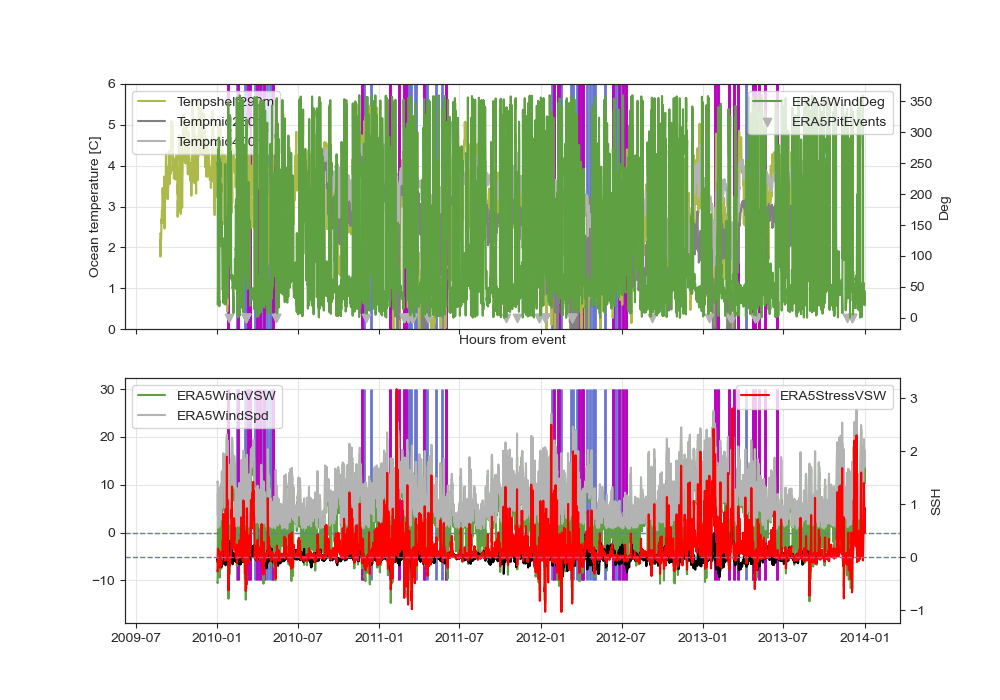

In [19]:
piteraq = era5WindH['2010':'2013'][era5WindH['2010':'2013']['ERA5PitEvents']==True]

fig, ax = plt.subplots(ncols=1,nrows=2,sharex=True,figsize=(10,7))

a2 = ax[0]
a2.grid(color='0.9')
a2.plot(era5WindH.index,era5WindH['Tempshelf290m'],color='C1',label=era5WindH['Tempshelf290m'].name)
a2.plot(era5WindH.index,era5WindH['Tempmid250m'],color='0.5',label=era5WindH['Tempmid250m'].name)
a2.plot(era5WindH.index,era5WindH['Tempmid400m'],color='0.7',label=era5WindH['Tempmid400m'].name)
a2.vlines(x=ev_data.index,ymin=-10,ymax=30,lw=2)
a2.vlines(x=ev_data[(ev_data.Intrusion_inshore==1)].index,ymin=-10,ymax=30,colors='m',lw=2)
# a2.scatter((windev>0).index,windev>0,color='k')
a2.set_ylim([0,6])
a2.set_xlabel('Hours from event')
a2.set_ylabel('Ocean temperature [C]')
a2.legend(loc='upper left')
# # a2.set_xlim('10-01-2009','01-01-2014')

a1 = a2.twinx()
# a1.grid(color='0.9')
a1.plot(era5WindH.index,era5WindH['ERA5WindDeg'],color='C3',label=era5WindH['ERA5WindDeg'].name)
a1.scatter(piteraq.index,piteraq['ERA5PitEvents']==50,color='0.7',marker='v',label=era5WindH['ERA5PitEvents'].name)
# a1.plot(era5WindH.index,era5WindH['ERA5WindDeg'],color='C3')
a1.set_ylabel('Deg')
a1.legend(loc='upper right')
# a1.set_xlim('10-01-2009','01-01-2014')

a3 = ax[1]
a3.grid(color='0.9')
# a3.plot(era5WindM.index,era5WindM['ERA5WindCurlI'],color='k')
# a3.plot(era5WindM.index,era5WindM['ERA5WindCurlC'],color='r')
a3.vlines(x=ev_data.index,ymin=-10,ymax=30,lw=2)
a3.vlines(x=ev_data[(ev_data.Intrusion_inshore==1)].index,ymin=-10,ymax=30,colors='m',lw=2)
a3.plot(era5WindH.index,era5WindH['ERA5WindVSW'],color='C3',label=era5WindH['ERA5WindVSW'].name)
a3.plot(era5WindH.index,era5WindH['ERA5WindSpd'],color='0.7',label=era5WindH['ERA5WindSpd'].name)
# a3.plot(curldif,color='g')
a3.axhline(y=0,linestyle='dashed',lw=1)
a3.legend()

a4 = a3.twinx()
# a1.grid(color='0.9')
a4.plot(era5WindH.index,era5WindH['SSH'],color='k')
a4.plot(era5WindH.index,era5WindH['ERA5StressVSW'],color='r',label=era5WindH['ERA5StressVSW'].name)
a4.axhline(y=0,linestyle='dashed',lw=1)
a4.set_ylabel('SSH')
a4.legend(loc='upper right')
# a3.set_xlim('10-01-2009','01-01-2014')


# plt.title(timed[t])
# plt.savefig(('/Users/tsnow03/GoogleDrive/User/Docs/PhD_Project/MODIS_Manuscript/Figures/WindEvents/MoorWindEv%4d%02d%02d.jpg' %(timed[i].year,timed[i].month,timed[i].day)), format='jpg', dpi=600)


In [20]:
# Determine length of upwelling favorable wind event, and add columns for it, wind direction, and if piteraq event occurred
# Length of upwelling is hours from onset to when alongshore winds become positive again
# Piteraq events based on >20m/s oriented in direction from Oltmanns - 1 is piteraq happens during/after intrusion
era5WindH['wind_index'] = pd.Series(era5WindH.index, index=era5WindH.index)[era5WindH.ERA5WindVSW>=0]
era5WindH['wind_index'].fillna(method='bfill', inplace=True)
era5WindH['wind_next'] = (era5WindH['wind_index'] - era5WindH.index).astype('timedelta64[h]')
era5WindH['windst_index'] = pd.Series(era5WindH.index, index=era5WindH.index)[era5WindH.ERA5StressVSW>=0]
era5WindH['windst_index'].fillna(method='bfill', inplace=True)
era5WindH['windst_next'] = (era5WindH['windst_index'] - era5WindH.index).astype('timedelta64[h]')
era5WindH['WindDegShift'] = era5WindH['ERA5WindDeg'].shift(-1)
era5WindH['WindVSWChange'] = era5WindH['ERA5WindVSW'].shift(1) - era5WindH['ERA5WindVSW'] # Difference between the day before and day of
era5WindH['StressVSWChange'] = era5WindH['ERA5StressVSW'].shift(3) - era5WindH['ERA5StressVSW'] # Difference between the day before and day of
era5WindH['SSHChange2d'] = era5WindH['SSH'].shift(3) - era5WindH['SSH']#.shift(-2) # Difference between the 18-hr before and 12-hr after since 6H lag

ev_data[['WindDegShift','WindDuration','wind_next','WindStrDuration','windst_next','WindVSWChange','StressVSWChange','SSHChange2d']] = era5WindH[['WindDegShift','wind_next','wind_index','windst_next','windst_index','WindVSWChange','StressVSWChange','SSHChange2d']].loc[ev_data.index]
ev_data['WindVSW'] = np.round([era5WindH['ERA5WindVSW'].loc[ev_data.index[i]:ev_data.wind_next[i]].min() for i in range(len(ev_data.index))],1) # Max or mean wind speed during entire event
ev_data['StressVSW'] = np.round([era5WindH['ERA5StressVSW'].loc[ev_data.index[i]:ev_data.wind_next[i]].min() for i in range(len(ev_data.index))],3) # Max or mean wind speed during entire event
ev_data['WindDeg'] = [era5WindH['ERA5WindDeg'].loc[ev_data.index[i]:ev_data.wind_next[i]].mean() for i in range(len(ev_data.index))] # Max or mean wind direction during entire event
# ev_data['WindDeg'] = ev_data['WindDeg'].astype(int)
# ev_data['WindDuration'] = ev_data['WindDuration'].astype(int)
# ev_data['WindStrDuration'] = ev_data['WindStrDuration'].astype(int)
del era5WindH['wind_index'],era5WindH['wind_next'],ev_data['wind_next'],era5WindH['windst_index'],era5WindH['windst_next'],ev_data['windst_next']

print (ev_data['WindDuration'].loc[(ev_data.Intrusion_visible==1) & (ev_data['WindDuration']>0)].count())
print (ev_data['WindStrDuration'].loc[(ev_data.Intrusion_visible==1) & (ev_data['WindStrDuration']>0)].count())

43
49


In [21]:
ev_data = ev_data.loc[ev_data.index.month.isin([1,2,3,4,5,6])]

In [22]:
sub_ev_storm = ev_data
sub_ev_storm['Multi_event'] = np.nan


# allowed in because one is IC one is Serm cyclone
# sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('1-29-2012 06:00:00'))
# sub_ev_storm.Multi_event['1-25-2012 12:00:00'] = 2

# Same except 2-10 has extra LP_west greenland
sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2-8-2012 00:00:00'))
sub_ev_storm.Multi_event['2-10-2012 06:00:00'] = 2

# allowed in because one is IC one is Serm cyclone
# sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('3-07-2012 00:00:00'))
# sub_ev_storm.Multi_event['3-10-2012 18:00:00'] = 2

sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2-13-2010 18:00:00'))
sub_ev_storm.Multi_event['2-16-2010 06:00:00'] = 2

sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('3-3-2010 12:00:00'))
sub_ev_storm.Multi_event['3-5-2010 06:00:00'] = 2


sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2013-04-22 12:00:00'))
sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2013-04-27 00:00:00'))
sub_ev_storm.Multi_event['2013-04-23 00:00:00'] = 3 

# sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2010-11-22 18:00:00'))
# sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2010-11-28 00:00:00'))
# sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2010-12-13 18:00:00'))

sub_ev_storm.tail(2)

,MODIS_sighting,Intrusion_visible,Intrusion_inshore,HP_over_IC,HP_over_Gld,Piteraq,WindDegShift,WindDuration,WindStrDuration,WindVSWChange,StressVSWChange,SSHChange2d,WindVSW,StressVSW,WindDeg,Multi_event
Datetime,,,,,,,,,,,,,,,,
2013-05-20 12:00:00,2013-05-20,1.0,1.0,1.0,1.0,0,248.358577,30.0,24.0,3.006842,0.111817,0.137960,-3.5,-0.025,235.400763,NaN
2013-06-16 00:00:00,2013-06-16,1.0,1.0,1.0,1.0,0,118.986481,0.0,30.0,2.402995,0.019829,0.058733,0.1,-0.000,337.625380,NaN


In [23]:
print ('Visible intrusions')
print ('Total: '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))
print ('Have negative Stress VSW: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.WindStrDuration>0)].Intrusion_visible.sum()))
print ('                    '+str((sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.WindStrDuration>0)].Intrusion_visible.sum())*100/(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))+'%')
print ('Have piteraqs: '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Piteraq.sum()))
print ('                    '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Piteraq.sum()*100/sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum())+'of total')
print ('Have negative SSH: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.SSHChange2d<0)].Intrusion_visible.sum()))
print ('                    '+str((sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.SSHChange2d<0)].Intrusion_visible.sum())*100/(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))+'%')
print ('Have no VSW or SSH: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.SSHChange2d<0)&(sub_ev_storm.WindDuration==0)].Intrusion_visible.sum()))
print('')
print ('Intrusions inshore')
print ('Total: '+str(sub_ev_storm.Intrusion_inshore.sum()-1))
print ('2010: '+str(np.round(sub_ev_storm['2010'][sub_ev_storm.Intrusion_visible==1].Intrusion_inshore.sum()/(sub_ev_storm['2010'].Intrusion_visible.sum()-1),2)*100)+'%')
print ('2011: '+str(np.round(sub_ev_storm['2011'][sub_ev_storm.Intrusion_visible==1].Intrusion_inshore.sum()/sub_ev_storm['2011'].Intrusion_visible.sum(),2)*100)+'%')
print ('2012: '+str(np.round(sub_ev_storm['2012'][sub_ev_storm.Intrusion_visible==1].Intrusion_inshore.sum()/sub_ev_storm['2012'].Intrusion_visible.sum(),2)*100)+'%')
print ('2013: '+str(np.round(sub_ev_storm['2013'][sub_ev_storm.Intrusion_visible==1].Intrusion_inshore.sum()/sub_ev_storm['2013'].Intrusion_visible.sum(),2)*100)+'%')
print('')
wideE = 62.0
slimE = 62.0
noz = sub_ev_storm
noz = sub_ev_storm[sub_ev_storm.WindStrDuration>0]
print ('SSH change during neg wind stress intrusions: '+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.mean())+'+/-'+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.sem()))
print ('                                                             '+str(noz[(sub_ev_storm.Intrusion_visible==1)].SSHChange2d.count()))
noz = sub_ev_storm[sub_ev_storm.WindStrDuration==0]
print('Wind stress duration =0 intrusions:')
print ('SSH change during pos wind stress intrusions: '+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.mean())+'+/-'+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.sem()))
print ('                                                               '+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.count()))
print('')
print ('Intrusions with no wind reversal: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1) & (sub_ev_storm.WindStrDuration==0)].Intrusion_visible.sum()))
print ('Cross-shelf intrusions with no wind reversal: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_inshore==1) & (sub_ev_storm.WindStrDuration==0)].Intrusion_inshore.sum()))
print ('Total cross-shelf intrusions: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_inshore==1)].Intrusion_inshore.sum()))

Visible intrusions
Total: 53.0
Have negative Stress VSW: 44.0
                    83.01886792452831%
Have piteraqs: 6
                    11.320754716981131of total
Have negative SSH: 16.0
                    30.18867924528302%
Have no VSW or SSH: 3.0

Intrusions inshore
Total: 29.0
2010: 73.0%
2011: 50.0%
2012: 37.0%
2013: 90.0%

SSH change during neg wind stress intrusions: 0.03696993012226221+/-0.015214097491295007
                                                             44
Wind stress duration =0 intrusions:
SSH change during pos wind stress intrusions: 0.12026034945372932+/-0.032487050588203344
                                                               9

Intrusions with no wind reversal: 9.0
Cross-shelf intrusions with no wind reversal: 5.0
Total cross-shelf intrusions: 30.0


# Plot MOD09, SSTs, and winds together

In [6]:
# Plot and data extents
llcrnrlatA=64.4;urcrnrlatA=66.5;llcrnrlonA=-39.0;urcrnrlonA=-34.0 # For Figure S1
llcrnrlatA=64.3;urcrnrlatA=66.5;llcrnrlonA=-41.0;urcrnrlonA=-34.7 # For Figure S1
llcrnrlat2=64.3;urcrnrlat2=66.5;llcrnrlon2=-40.0;urcrnrlon2=-34.7 # For Figure S1
llcrnrlatB=63.0;urcrnrlatB=68.9;llcrnrlonB=-42.0;urcrnrlonB=-28.0 # For Regional Figure S1
# llcrnrlat2=64.3;urcrnrlat2=66.5;llcrnrlon2=-41.0;urcrnrlon2=-34.7 # For Figure 1
# latboundsb = [ 60.5 , 68.5 ] # Entire Serm Shelf
# lonboundsb = [ -45 , -28 ]

latboundsb = [ 62.4 , 66.6 ] # Entire Serm Shelf
lonboundsb = [ -44 , -33 ]

latboundsr = [ 62.4 , 70.0 ] # Regional 
lonboundsr = [ -45 , -25 ]

In [7]:
# Bed Machine Greenland bathymetry
bedmach = Dataset('/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/Data/BedMachineAntarctica_2019-11-05_v01.nc')

# Extract variables
lonsb = bedmach.variables['x']
latsb = bedmach.variables['y']
bathy = bedmach.variables['bed']
bathy = bathy[10000:17500,5000:10000]

x_b,y_b = np.meshgrid(lonsb,latsb[::-1])
inProj =pyproj.Proj(init='EPSG:3413')
outProj =pyproj.Proj(init='EPSG:4326')
x_b,y_b = pyproj.transform(inProj,outProj,x_b,y_b)
x_b = np.flipud(x_b)[10000:17500,5000:10000]
y_b = np.flipud(y_b)[10000:17500,5000:10000]

In [8]:
# ERA-5 Wind fields taken for designated box to make timeseries - every 6 hrs
# Wind deg = direction from, U/V going towards - wind deg of 60 is along shore winds that are -U and -V
# Winds SW = V is pos with alongshore winds and windDegSW will be 180

# Get lats and lons and spatial sampling box indices here because same for every image
bdir = '/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/Data/Helheim_Data/ERA5/'
pdir = '/Volumes/LaCieGrande/ERA5_Pressure/'

yearStart = 2013
yearEnd = 2013
monthStart = 2
monthEnd = 3

ref = os.listdir(bdir)[1]
fhref = Dataset(bdir+ref, mode='r')  
lat_era = fhref.variables['latitude'][:]
if fhref.variables['longitude'][0] > 0:
    lon_era = fhref.variables['longitude'][:]-360
else:
    lon_era = fhref.variables['longitude'][:]
lat_indsb = np.where((lat_era > latboundsr[0]) & (lat_era < latboundsr[1]))
lon_indsb = np.where((lon_era > lonboundsr[0]) & (lon_era < lonboundsr[1]))
lat_sub = lat_era[lat_indsb[0]]
lon_sub = lon_era[lon_indsb[0]]
x_W,y_W = np.meshgrid(lon_sub,lat_sub)

try:
    del windspd_array,windu_array,windv_array,time_array #pres_array,
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = bdir + "/era5_daily_%04d%02d.nc" % (year, month)
        era = Dataset(file_era, mode='r')
        windu_era = era.variables['u10'][:,lat_indsb[0],lon_indsb[0]]
        windv_era = era.variables['v10'][:,lat_indsb[0],lon_indsb[0]]
        windspd_era = np.sqrt(windu_era**2 + windv_era**2)
        
        time_era= era.variables['time']
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))
        
#         filep_era = pdir + "/era5_daily_mslpressure_%04d%02d.nc" % (year, month)
#         pera = Dataset(filep_era, mode='r')
#         pres_era = pera.variables['msl'][:,lat_indsb[0],lon_indsb[0]]

        try:
            windspd_array = np.dstack((windspd_array, np.moveaxis(windspd_era, 0, -1)))
            windu_array = np.dstack((windu_array, np.moveaxis(windu_era, 0, -1)))
            windv_array = np.dstack((windv_array, np.moveaxis(windv_era, 0, -1)))
#             pres_array = np.dstack((pres_array, np.moveaxis(pres_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            windspd_array = np.moveaxis(windspd_era, 0, -1)
            windu_array = np.moveaxis(windu_era, 0, -1)
            windv_array = np.moveaxis(windv_era, 0, -1)
#             pres_array = np.moveaxis(pres_era, 0, -1)
            time_array = time_eraconv
        era.close()
#         pera.close()

no old variable to delete


In [20]:
# # Get lats and lons and spatial sampling box indices here because same for every image
# llcrnrlatA=64.4;urcrnrlatA=66.5;llcrnrlonA=-39.0;urcrnrlonA=-34.0 # For Figure S1
# llcrnrlat2=64.4;urcrnrlat2=66.55;llcrnrlon2=-41.0;urcrnrlon2=-34.7 # For Figure 1

# latboundsb = [ 62.5 , 66.5 ] # Entire Serm Shelf
# lonboundsb = [ -41 , -33 ]

# bdir = '/Volumes/Colossus/SST_Helheim_images/GHRSST_L2/'
# mfiles = os.listdir(bdir)
# mfile = mfiles[6]
# file_sst = bdir + mfile 
# sst = Dataset(file_sst, mode='r')
# lat_sst = sst.variables['lat'][:]
# lon_sst = sst.variables['lon'][:]
# lat_indsb = np.where((lat_sst > latboundsb[0]) & (lat_sst < latboundsb[1]))
# lon_indsb = np.where((lon_sst > lonboundsb[0]) & (lon_sst < lonboundsb[1]))
# lats_sub = lat_sst[lat_indsb[0]] # subsetting lat lon so can sample later
# lons_sub = lon_sst[lon_indsb[0]] # subsetting lat lon so can sample later
# time_sst= sst.variables['time']

# temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
# qa_sst = sst.variables['quality_level'][0,:,:]
# temp_sst = np.where(temp_sst>=-1.7,temp_sst,np.nan)
# # temp_sst = np.where(qa_sst>=2,temp_sst,np.nan)
# sst.close()

In [9]:
cd /Volumes/Colossus/SST_Helheim_images/MOD09/

/Volumes/Colossus/SST_Helheim_images/MOD09


In [10]:
m09files = glob.glob('M*')
m09files.sort()

In [11]:
cd /Volumes/Colossus/SST_Helheim_images/GHRSST_L2/

/Volumes/Colossus/SST_Helheim_images/GHRSST_L2


In [12]:
mfiles = glob.glob('20*')
mfiles.sort()

mdir = '/Volumes/Colossus/SST_Helheim_images/MOD09/'
bdir = '/Volumes/Colossus/SST_Helheim_images/GHRSST_L2/'

201004161535
20100416153507-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.ncTrue
/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_compS1narrow201004161535MOD-D.jpg


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
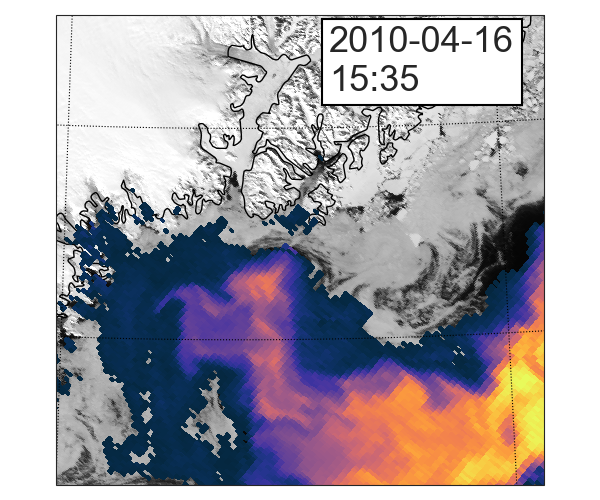

201104191355
20110419135508-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.ncTrue
/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_compS1narrow201104191355MOD-D.jpg


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
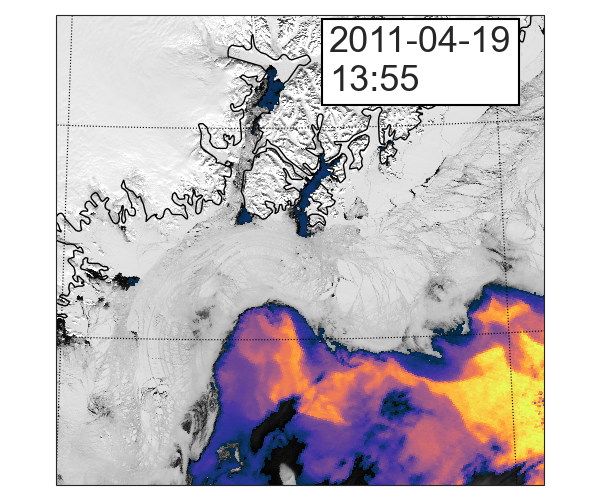

In [14]:
# Plot Sermilik Trough visible, SST and winds together
for m09file in m09files[:1]:
    m = 0
    mod09 = SD(mdir+m09file, SDC.READ)
    date = date_from_julian_date(m09file[7:14])
    year = date.year
    month = str(date.month).zfill(2)
    day = str(date.day).zfill(2)
    time = m09file[15:19]
    print (f'{year}{month}{day}{time}')

#         #Examine key of Level 3 outputs available
#         print ('MODIS dataset key:')
#         for key in mod09.datasets(): print (key)

    B1 = mod09.select('250m Surface Reflectance Band 1')[:] #red
    # R,G,B = mod09.select('500m Surface Reflectance Band 1')[:],mod09.select('500m Surface Reflectance Band 4')[:],mod09.select('500m Surface Reflectance Band 3')[:]
    mlat, mlon = mod09.select('Latitude')[:], mod09.select('Longitude')[:]
    mlat250,mlon250 = scipy.ndimage.zoom(mlat, 4, order=1),scipy.ndimage.zoom(mlon, 4, order=1)
    # mlat500,mlon500 = scipy.ndimage.zoom(mlat, 2, order=1),scipy.ndimage.zoom(mlon, 2, order=1)
    B1n = (255 * (B1 / B1.max())).astype(np.uint8)
    # B4n = (255 * (B4 / B4.max())).astype(np.uint8)
    # B3n = (255 * (B3 / B3.max())).astype(np.uint8)
    B1f = (B1 / 16000.0)
    # B4f = (B4 / 16000.0)
    # B3f = (B3 / 16000.0)
    # mesh_rgb = np.dstack([B1f,B4f,B3f]).astype(float)
    # mesh_rgb[mesh_rgb<0] = 0

    # p2, p98 = np.percentile(mesh_rgb[:,:,1], (2, 98))
    p2, p98 = np.percentile(B1f, (2, 98))
    img_rescale = exposure.rescale_intensity(B1f, in_range=(p2, p98))
    for mfile in mfiles:
        if mfile[0:12]==f'{year}{month}{day}{time}':
            m = 1
            print (mfile+str(mfile[0:12]==f'{year}{month}{day}{time}'))
            file_sst = bdir + mfile 
            sst = Dataset(file_sst, mode='r')
            lat_sst = sst.variables['lat'][:]
            lon_sst = sst.variables['lon'][:]
            lat_indsb = np.where((lat_sst > latboundsb[0]) & (lat_sst < latboundsb[1]))
            lon_indsb = np.where((lon_sst > lonboundsb[0]) & (lon_sst < lonboundsb[1]))
            lats_sub = lat_sst[lat_indsb[0]] # subsetting lat lon so can sample later
            lons_sub = lon_sst[lon_indsb[0]] # subsetting lat lon so can sample later
            time_sst= sst.variables['time']

            temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
            temp_sst = np.where(temp_sst>=-1.7,temp_sst,np.nan) #2010-04 needs to be set to -1.3
        #     qa_sst = sst.variables['quality_level'][0,:,:]
            # temp_sst = np.where(qa_sst>=2,temp_sst,np.nan)
        #     time_sstconv = pd.to_datetime(netCDF4.num2date(time_sst[:], time_sst.units, time_sst.calendar))
            sst.close()
            outfile = f'/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_compS1narrow{year}{month}{day}{time}{m09file[0:3]}-{mfile[46]}.jpg'
#             outfile = f'/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_vertcolorbar.jpg'
            print (outfile)
    if m==0:
        print ('No SST match found')
        continue
    
    # Plot SST and MOD09
    fig,ax = plt.subplots(figsize=(6,5)) 
    plt.axis('off')

    m = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-38))
    m.set_extent([llcrnrlon2, urcrnrlon2, llcrnrlat2, urcrnrlat2], ccrs.PlateCarree())
    m.coastlines(resolution='10m')
    gl = m.gridlines(draw_labels=False,xlocs=[-45,-40,-35],ylocs=[65,66],y_inline=False,color='k',linestyle=':')
    m.pcolormesh(mlon250,mlat250,img_rescale,transform=ccrs.PlateCarree(),cmap='gray',zorder=1)
    data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=6.0,zorder=2)
    
#     if m==1:
#         data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=6.0,zorder=2)
#     elif m==0:
#         outfile = f'/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_compS1{year}{month}{day}{time}{m09file[0:3]}.jpg'
        
#             dt = pd.to_datetime(mfile[0:12],format='%Y%m%d%H%M').to_datetime64()
#             idx = (np.abs(time_array - dt) / np.timedelta64(1, 'm')).argmin()
#             print (((time_array - dt)/ np.timedelta64(1, 'm'))[idx])
#             print (time_array[idx])
#             Q = m.quiver(x_W,y_W,windu_array[:,:,idx],windv_array[:,:,idx],edgecolors='k',facecolor='firebrick',headwidth=3,headlength=5,minlength=3,scale=150,transform=ccrs.PlateCarree())
#             qk = plt.quiverkey(Q,0.95,1.05,10,'10 m/s',labelpos='W') #, scale_units='meters'
#     plt.annotate(f'{year}-{month}-{day}\n{time[0:2]}:{time[2:]}',(-108.5,-73.0),xycoords='polar',xytext=(0.02,0.9),textcoords='axes fraction',fontsize=26,rotation=0,va='center',zorder=4,
#                 bbox=dict(fc='white',ec='k',lw=1.5,boxstyle='square,pad=0.2'))
    plt.annotate(f'{year}-{month}-{day}\n{time[0:2]}:{time[2:]}',(-108.5,-73.0),xycoords='polar',xytext=(0.56,0.9),textcoords='axes fraction',fontsize=26,rotation=0,va='center',zorder=4,
                bbox=dict(fc='white',ec='k',lw=1.5,boxstyle='square,pad=0.2'))
    
    cs = m.contour(x_b,y_b,bathy,[-500,-250],colors='k',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=1.5,alpha=0.7,zorder=3)
    fmt = {}
    strs = ['500','250']
    for l,s in zip(cs.levels,strs):
        fmt[l] = s
    plt.clabel(cs, cs.levels[[0,1]],inline=True, fmt=fmt, fontsize=10, colors='k',zorder=3)
    
    # Colorbar your face off
    plt.tick_params(labelsize=14)
    cb = plt.colorbar(data,ticks=[-1,0,1,2,3,4,5,6],fraction=0.045,pad=0.03,orientation='vertical')
    cb.ax.set_xticklabels(['-1','0','1','2','3','4','5','6'])
    cb.ax.set_xticklabels(cb.ax.get_xticklabels())
    cb.ax.set_yticklabels(cb.ax.get_yticklabels())
    cb.outline.set_edgecolor('k')
    cb.outline.set_linewidth(1)
    cb.ax.tick_params(color='k',size=5,labelsize=12)
    cb.set_label('Temperature [C]',rotation=270,fontsize=16,labelpad=25)

    plt.tight_layout()
    plt.savefig(outfile, format='jpg', dpi=500)
    plt.show()

In [25]:
# cd /Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/EPSL_initialround/Figures/SST_movie

/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/EPSL_initialround/Figures/SST_movie


In [30]:
# import imageio

# sstfiles = glob.glob('2013*')
# sstfiles.sort()

# images = []
# x = 0
# for i in range(len(sstfiles)):
#     images.append(imageio.imread(f'/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/EPSL_initialround/Figures/SST_movie/{sstfiles[i]}'))
#     x = x + 1
# imageio.mimsave('/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/EPSL_initialround/Figures/SST_timeseries_movie.gif',images,duration=1.5)

In [34]:
from skimage import measure

def icefront(dem,contour):
    '''
    Find longest contour in a DEM - represents ice front
    '''
    contours = measure.find_contours(dem,contour,fully_connected='high')
    front = max(contours,key=len)
    
    return contours,front

def acquire_contours(image,lats,lons,thresh=0,cont=-0.5,epsg='3031'):

    contours,front = icefront(image,cont)
    
    contours_sort = sorted(contours, key=len)
    long_cont = [cc for cc in contours_sort if len(cc)>=thresh]
    len_cont = [len(cc) for cc in long_cont]

    # Put into format where lat/lons are separate, rounded and in a list
    front = np.around(front,0).astype(int)
    front_t = [tuple([x[1],x[0]]) for x in front]
#     print(len(front_t))

    flons = []
    flats = []
    for i in front_t:
        flats.append(i[0])
        flons.append(i[1])
#     len(flats)

    ib_t = [[[np.around(x[1],0).astype(int),np.around(x[0],0).astype(int)] for x in ib] for ib in long_cont]
#     print(len(ib_t))

    ilons = []
    ilats = []
    for i in ib_t:
        for j in i:
            ilats.append(j[0])
            ilons.append(j[1])
#     len(ilats)

    # Convert to lat/lons rather than row,col space and stack
    # Get image coordinates for all contours
    if lats.ndim==1:
        lons, lats = np.meshgrid(lons,lats)
        
    Flons1 = lons[flons,flats]
    Flats1 = lats[flons,flats]
    Fcoords1 = np.vstack([Flats1.ravel(),Flons1.ravel()]).T # note y / x switch (i.e., lat long convention)

    Ilons1 = lons[ilons,ilats]
    Ilats1 = lats[ilons,ilats]
    Icoords1 = np.vstack([Ilats1.ravel(),Ilons1.ravel()]).T # note y / x switch (i.e., lat long convention)

    # If reprojected in WG84 already
    if -90<np.nanmean(Flats1)<90:
        Wcoords1 = Fcoords1
        Wcoords2 = Icoords1

    # If in wrong projection
    else:
        inProj = pyproj.CRS(f'epsg:{epsg}')
        outProj = pyproj.CRS('epsg:4326') 
        Wlat1,Wlon1 = pyproj.transform(inProj,outProj,Flons1,Flats1)
        Wlat2,Wlon2 = pyproj.transform(inProj,outProj,Ilons1,Ilats1)

        Wcoords1 = [[Wlat1[i],Wlon1[i]] for i in range(len(Wlat1))]
        Wcoords2 = [[Wlat2[i],Wlon2[i]] for i in range(len(Wlat2))]
    
    return Wcoords2,Wcoords1

In [95]:
# Capture SSTs for contours of beginning during and after intrusion event for later plotting
cont0_f = m09files[12]
cont1_f = m09files[16]
cont2_f = m09files[8]
cont2_f = m09files[17]

cont_f = cont0_f

date = date_from_julian_date(cont_f[7:14])
year = date.year
month = str(date.month).zfill(2)
day = str(date.day).zfill(2)
time = cont_f[15:19]
cont = -1.5 #-0.5
zoom_s = 5
cont_thresh = 5
temp_thresh = -30 # -1.5

for mfile in mfiles:
    if mfile[0:12]==f'{year}{month}{day}{time}':
        m = 1
        print (mfile+str(mfile[0:12]==f'{year}{month}{day}{time}'))
        file_sst = bdir + mfile 
        sst = Dataset(file_sst, mode='r')
        lat_sst0 = sst.variables['lat'][:]
        lon_sst0 = sst.variables['lon'][:]
        lat_sst0_s = scipy.ndimage.zoom(lat_sst0, zoom_s)
        lon_sst0_s = scipy.ndimage.zoom(lon_sst0, zoom_s)
        temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
        temp_sst_s = scipy.ndimage.zoom(temp_sst, zoom_s)
        temp_sst0 = np.where(temp_sst>=temp_thresh,temp_sst,np.nan)
        temp_sst0_s = np.where(temp_sst_s>=temp_thresh,temp_sst_s,np.nan) #2010-04 needs to be set to -1.3
        contours0,front0 = acquire_contours(temp_sst0,lat_sst0,lon_sst0,thresh=cont_thresh,cont=cont)
        contours0_s,front0_s = acquire_contours(temp_sst0_s,lat_sst0_s,lon_sst0_s,thresh=cont_thresh,cont=cont)
        sst.close()

cont_f = cont1_f

date = date_from_julian_date(cont_f[7:14])
year = date.year
month = str(date.month).zfill(2)
day = str(date.day).zfill(2)
time = cont_f[15:19]

for mfile in mfiles:
    if mfile[0:12]==f'{year}{month}{day}{time}':
        m = 1
        print (mfile+str(mfile[0:12]==f'{year}{month}{day}{time}'))
        file_sst = bdir + mfile 
        sst = Dataset(file_sst, mode='r')
        lat_sst1 = sst.variables['lat'][:]
        lon_sst1 = sst.variables['lon'][:]
        lat_sst1_s = scipy.ndimage.zoom(lat_sst1, zoom_s)
        lon_sst1_s = scipy.ndimage.zoom(lon_sst1, zoom_s)
        temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
        temp_sst_s = scipy.ndimage.zoom(temp_sst, zoom_s)
        temp_sst1 = np.where(temp_sst>=temp_thresh,temp_sst,np.nan)
        temp_sst1_s = np.where(temp_sst_s>=temp_thresh,temp_sst_s,np.nan) #2010-04 needs to be set to -1.3
        contours1,front1 = acquire_contours(temp_sst1,lat_sst1,lon_sst1,thresh=cont_thresh,cont=cont)
        contours1_s,front1_s = acquire_contours(temp_sst1_s,lat_sst1_s,lon_sst1_s,thresh=cont_thresh,cont=cont)
        sst.close()
        
cont_f = cont2_f

date = date_from_julian_date(cont_f[7:14])
year = date.year
month = str(date.month).zfill(2)
day = str(date.day).zfill(2)
time = cont_f[15:19]

for mfile in mfiles:
    if mfile[0:12]==f'{year}{month}{day}{time}':
        m = 1
        print (mfile+str(mfile[0:12]==f'{year}{month}{day}{time}'))
        file_sst = bdir + mfile 
        sst = Dataset(file_sst, mode='r')
        lat_sst2 = sst.variables['lat'][:]
        lon_sst2 = sst.variables['lon'][:]
        lat_sst2_s = scipy.ndimage.zoom(lat_sst2, zoom_s)
        lon_sst2_s = scipy.ndimage.zoom(lon_sst2, zoom_s)
        temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
        temp_sst_s = scipy.ndimage.zoom(temp_sst, zoom_s)
        temp_sst2 = np.where(temp_sst>=temp_thresh,temp_sst,np.nan)
        temp_sst2_s = np.where(temp_sst_s>=temp_thresh,temp_sst_s,np.nan) #2010-04 needs to be set to -1.3
        contours2,front2 = acquire_contours(temp_sst2,lat_sst2,lon_sst2,thresh=cont_thresh,cont=cont)
        contours2_s,front2_s = acquire_contours(temp_sst2_s,lat_sst2_s,lon_sst2_s,thresh=cont_thresh,cont=cont)
        sst.close()

20130227150009-JPL-L2P_GHRSST-SSTskin-MODIS_A-D-v02.0-fv01.0.ncTrue
20130301145008-JPL-L2P_GHRSST-SSTskin-MODIS_A-D-v02.0-fv01.0.ncTrue
20130302151509-JPL-L2P_GHRSST-SSTskin-MODIS_T-N-v02.0-fv01.0.ncTrue


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
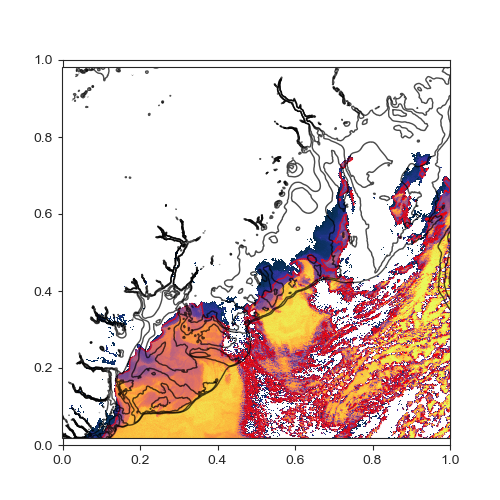

In [121]:
fig, ax = plt.subplots(figsize=(5,5))
m = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-38))
m.set_extent([llcrnrlonB, urcrnrlonB, llcrnrlatB, urcrnrlatB], ccrs.PlateCarree())
data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=7.0,zorder=2)
cs = m.contour(lon_sst,lat_sst,temp_sst,[0.0],colors='c',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=2.0,alpha=0.7,zorder=2)
cs = m.contour(x_b,y_b,bathy,[-500,-350,-250],colors='k',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=1.0,alpha=0.7,zorder=2)

In [31]:
mfiles

['20100416153507-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.nc',
 '20110419135508-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.nc',
 '20130227132509-JPL-L2P_GHRSST-SSTskin-MODIS_A-N-v02.0-fv01.0.nc',
 '20130227144509-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.nc',
 '20130227150009-JPL-L2P_GHRSST-SSTskin-MODIS_A-D-v02.0-fv01.0.nc',
 '20130301051009-JPL-L2P_GHRSST-SSTskin-MODIS_A-N-v02.0-fv01.0.nc',
 '20130301064509-JPL-L2P_GHRSST-SSTskin-MODIS_A-N-v02.0-fv01.0.nc',
 '20130301125509-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.nc',
 '20130301143509-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.nc',
 '20130301145008-JPL-L2P_GHRSST-SSTskin-MODIS_A-D-v02.0-fv01.0.nc',
 '20130301223509-JPL-L2P_GHRSST-SSTskin-MODIS_T-N-v02.0-fv01.0.nc',
 '20130302001509-JPL-L2P_GHRSST-SSTskin-MODIS_T-N-v02.0-fv01.0.nc',
 '20130302135509-JPL-L2P_GHRSST-SSTskin-MODIS_A-N-v02.0-fv01.0.nc',
 '20130302151509-JPL-L2P_GHRSST-SSTskin-MODIS_T-N-v02.0-fv01.0.nc',
 '20130302153009-JPL-L2P_GHRSST-SSTskin-MODIS_A-

201303021515
20130302151509-JPL-L2P_GHRSST-SSTskin-MODIS_T-N-v02.0-fv01.0.ncTrue
/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_regionalmain201303021515MOD-N.jpg


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
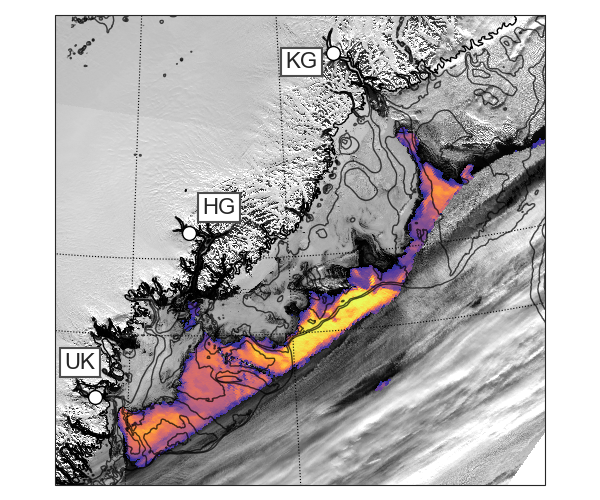

In [43]:
# Plot REGIONAL visible, SST and winds together
mdir = '/Volumes/Colossus/SST_Helheim_images/MOD09/'
bdir = '/Volumes/Colossus/SST_Helheim_images/GHRSST_L2/'

m09file1 = [m09files[8]] #2 has bad cloud over K, 11-worse,12-best before, 16 best intrusion, 17/7 (1300) and 8 (1500) best after
# m09file1 = [m09files[17],m09files[7]]
n = 0

# Plot SST and MOD09
fig,ax = plt.subplots(figsize=(6,5)) 
plt.axis('off')

m = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-38))
m.set_extent([llcrnrlonB, urcrnrlonB, llcrnrlatB, urcrnrlatB], ccrs.PlateCarree())
m.coastlines(resolution='10m')
gl = m.gridlines(draw_labels=False,xlocs=[-45,-40,-35],ylocs=[65,66],y_inline=False,color='k',linestyle=':')

for m09file in m09file1:
    mod09 = SD(mdir+m09file, SDC.READ)
    date = date_from_julian_date(m09file[7:14])
    year = date.year
    month = str(date.month).zfill(2)
    day = str(date.day).zfill(2)
    time = m09file[15:19]
    print (f'{year}{month}{day}{time}')

    #         #Examine key of Level 3 outputs available
    #         print ('MODIS dataset key:')
    #         for key in mod09.datasets(): print (key)

    B1 = mod09.select('250m Surface Reflectance Band 1')[:] #red
    # R,G,B = mod09.select('500m Surface Reflectance Band 1')[:],mod09.select('500m Surface Reflectance Band 4')[:],mod09.select('500m Surface Reflectance Band 3')[:]
    mlat, mlon = mod09.select('Latitude')[:], mod09.select('Longitude')[:]
    mlat250,mlon250 = scipy.ndimage.zoom(mlat, 4, order=1),scipy.ndimage.zoom(mlon, 4, order=1)
    # mlat500,mlon500 = scipy.ndimage.zoom(mlat, 2, order=1),scipy.ndimage.zoom(mlon, 2, order=1)
    B1n = (255 * (B1 / B1.max())).astype(np.uint8)
    # B4n = (255 * (B4 / B4.max())).astype(np.uint8)
    # B3n = (255 * (B3 / B3.max())).astype(np.uint8)
    B1f = (B1 / 16000.0)
    # B4f = (B4 / 16000.0)
    # B3f = (B3 / 16000.0)
    # mesh_rgb = np.dstack([B1f,B4f,B3f]).astype(float)
    # mesh_rgb[mesh_rgb<0] = 0

    # p2, p98 = np.percentile(mesh_rgb[:,:,1], (2, 98))
    p2, p98 = np.percentile(B1f, (2, 98))
    img_rescale = exposure.rescale_intensity(B1f, in_range=(p2, p98))
    for mfile in mfiles:
        if mfile[0:12]==f'{year}{month}{day}{time}':
            n = 1
            print (mfile+str(mfile[0:12]==f'{year}{month}{day}{time}'))
            file_sst = bdir + mfile 
            sst = Dataset(file_sst, mode='r')
            lat_sst = sst.variables['lat'][:]
            lon_sst = sst.variables['lon'][:]
            lat_indsb = np.where((lat_sst > latboundsb[0]) & (lat_sst < latboundsb[1]))
            lon_indsb = np.where((lon_sst > lonboundsb[0]) & (lon_sst < lonboundsb[1]))
            lats_sub = lat_sst[lat_indsb[0]] # subsetting lat lon so can sample later
            lons_sub = lon_sst[lon_indsb[0]] # subsetting lat lon so can sample later
            time_sst= sst.variables['time']

            temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
            temp_sst = np.where(temp_sst>=-0.5,temp_sst,np.nan) #2010-04 needs to be set to -1.3
        #     qa_sst = sst.variables['quality_level'][0,:,:]
            # temp_sst = np.where(qa_sst>=2,temp_sst,np.nan)
        #     time_sstconv = pd.to_datetime(netCDF4.num2date(time_sst[:], time_sst.units, time_sst.calendar))
            sst.close()
            outfile = f'/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_regionalmain{year}{month}{day}{time}{m09file[0:3]}-{mfile[46]}.jpg'
            print (outfile)
    if n==0:
        print ('No SST match found')


    m.pcolormesh(mlon250,mlat250,img_rescale,transform=ccrs.PlateCarree(),cmap='gray',zorder=1)
    data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=7.0,zorder=2)

#     m.plot([-30.272,-30.859],[67.519,67.387],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)#
#     m.plot([-37.265,-37.900],[65.301,65.180],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)
#     m.plot([-40.018,-40.232],[64.135,64.007],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)
m.scatter([-33.000,-38.200,-40.9997],[68.633,66.350,64.1673],facecolor='white',edgecolor='k',marker='o',s=100,transform=ccrs.PlateCarree(),zorder=4) #Kanger,Helheim,Umiiviip Kangertiva

#     if m==1:
#         data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=6.0,zorder=2)
#     elif m==0:
#         outfile = f'/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_compS1{year}{month}{day}{time}{m09file[0:3]}.jpg'

# dt = pd.to_datetime(f'{year}{month}{day}{time}',format='%Y%m%d%H%M').to_datetime64()
# idx = (np.abs(time_array - dt) / np.timedelta64(1, 'm')).argmin()
# print (((time_array - dt)/ np.timedelta64(1, 'm'))[idx])
# print (time_array[idx])
# Q = m.quiver(x_W,y_W,windu_array[:,:,idx],windv_array[:,:,idx],edgecolors='k',facecolor='dodgerblue',headwidth=3,headlength=5,minlength=3,scale=150,transform=ccrs.PlateCarree(),zorder=3) #blue-4ECDC4,A9D3FF
# qk = plt.quiverkey(Q,0.95,1.05,10,'10 m/s',labelpos='W') #, scale_units='meters'
# plt.annotate(f'{year}-{month}-{day}',(-108.5,-73.0),xycoords='polar',xytext=(0.03,0.92),textcoords='axes fraction',fontsize=25,rotation=0,va='center',zorder=4,
#             bbox=dict(fc='white',ec='0.3',boxstyle='square,pad=0.2'))
plt.annotate('KG',(-108.5,-73.0),xycoords='polar',xytext=(0.47,0.9),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
            bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
plt.annotate('HG',(-108.5,-73.0),xycoords='polar',xytext=(0.3,0.59),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
             bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
plt.annotate('UK',(-108.5,-73.0),xycoords='polar',xytext=(0.02,0.26),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
             bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
# m.contour(lon_sst0,lat_sst0,temp_sst0,[-0.5],colors='c',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=2.0,alpha=0.7,zorder=2)
# m.contour(lon_sst1,lat_sst1,temp_sst1,[-0.5],colors='dodgerblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=2.0,alpha=0.7,zorder=2)
# m.contour(lon_sst2,lat_sst2,temp_sst2,[-0.5],colors='mediumblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=2.0,alpha=0.7,zorder=2)

cs = m.contour(x_b,y_b,bathy,[-500,-350,-250],colors='k',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=1.0,alpha=0.7,zorder=2)

# # Colorbar your face off
# cb = plt.colorbar(data,ticks=[,2,4,6],fraction=0.045,pad=0.03,orientation='horizontal')
# cb.ax.set_xticklabels(['0','2','4','6'])
# cb.ax.set_yticklabels(cb.ax.get_yticklabels())
# cb.outline.set_edgecolor('k')
# cb.outline.set_linewidth(1)
# cb.ax.tick_params(color='k',size=5,labelsize=12)
# cb.set_label('Temperature [C]',rotation=0,fontsize=16,labelpad=5)

plt.tight_layout()
plt.savefig(outfile, format='jpg', dpi=500)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
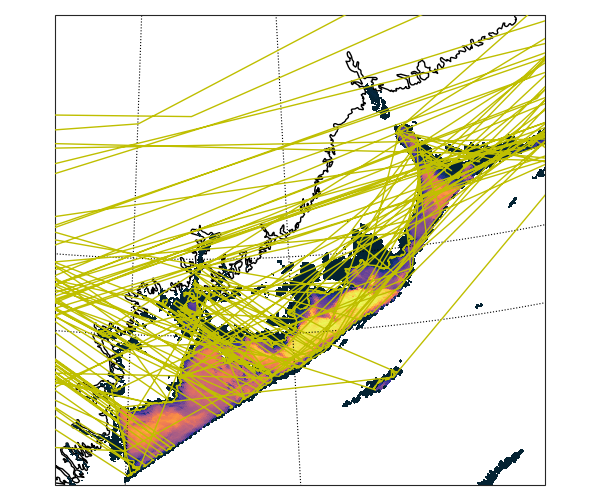

In [96]:
# If want to do inset close ups for regional SST/MOD09 intrusions

llcrnrlatB1=65.3;urcrnrlatB1=68.9;llcrnrlonB1=-34.0;urcrnrlonB1=-27.5 # For Regional Figure S1
# llcrnrlatB2=63.0;urcrnrlatB2=68.9;llcrnrlonB2=-42.0;urcrnrlonB2=-28.0 # For Regional Figure S1
llcrnrlatB3=63.0;urcrnrlatB3=64.6;llcrnrlonB3=-42.0;urcrnrlonB3=-37.2 # For Regional Figure S1

fig,ax = plt.subplots(figsize=(6,5)) 
plt.axis('off')

m = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-38))
m.set_extent([llcrnrlonB, urcrnrlonB, llcrnrlatB, urcrnrlatB], ccrs.PlateCarree())
m.coastlines(resolution='10m')
gl = m.gridlines(draw_labels=False,xlocs=[-45,-40,-35],ylocs=[65,66],y_inline=False,color='k',linestyle=':')
# m.pcolormesh(mlon250,mlat250,img_rescale,transform=ccrs.PlateCarree(),cmap='gray',zorder=1)
data = m.pcolormesh(lon_sst2,lat_sst2,temp_sst2,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=7.0,zorder=2)

#     m.plot([-30.272,-30.859],[67.519,67.387],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)#
#     m.plot([-37.265,-37.900],[65.301,65.180],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)
#     m.plot([-40.018,-40.232],[64.135,64.007],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)

# m.scatter([-33.000,-38.200,-40.9997],[68.633,66.350,64.1673],facecolor='white',edgecolor='k',marker='o',s=100,transform=ccrs.PlateCarree(),zorder=4) #Kanger,Helheim,Umiiviip Kangertiva

# plt.annotate(f'{year}-{month}-{day}',(-108.5,-73.0),xycoords='polar',xytext=(0.03,0.92),textcoords='axes fraction',fontsize=25,rotation=0,va='center',zorder=4,
#             bbox=dict(fc='white',ec='0.3',boxstyle='square,pad=0.2'))
# plt.annotate('KG',(-108.5,-73.0),xycoords='polar',xytext=(0.47,0.9),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
#             bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
# plt.annotate('HG',(-108.5,-73.0),xycoords='polar',xytext=(0.3,0.59),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
#              bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
# plt.annotate('UK',(-108.5,-73.0),xycoords='polar',xytext=(0.02,0.26),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
#              bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))


# for contour in contours:
m.plot(contours2[:,1],contours2[:,0],color='y',linewidth=1,transform=ccrs.PlateCarree(),zorder=3) 

# m.contour(lon_sst0_s,lat_sst0_s,temp_sst0_s,[-0.5],colors='c',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=2.0,alpha=0.9,zorder=2)
# m.contour(lon_sst1_s,lat_sst1_s,temp_sst1_s,[-0.5],colors='dodgerblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=2.0,alpha=0.9,zorder=2)
# m.contour(lon_sst2_s,lat_sst2_s,temp_sst2_s,[-0.5],colors='mediumblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=2.0,alpha=0.9,zorder=2)

# cs = m.contour(x_b,y_b,bathy,[-500,-350,-250],colors='k',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=1.0,alpha=0.7,zorder=2)

#             # Colorbar your face off
#             cb = plt.colorbar(data,ticks=[-1,0,1,2,3,4,5,6],fraction=0.045,pad=0.03,orientation='horizontal')
#             cb.ax.set_xticklabels(['-1','0','1','2','3','4','5','6'])
#             cb.ax.set_yticklabels(cb.ax.get_yticklabels())
#             cb.outline.set_edgecolor('k')
#             cb.outline.set_linewidth(1)
#             cb.ax.tick_params(color='k',size=5,labelsize=12)
#             cb.set_label('Temperature [C]',rotation=0,fontsize=16,labelpad=5)
# outfile = f'/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_regionalmainContours.jpg'
plt.tight_layout()
# plt.savefig(outfile, format='jpg', dpi=500)
# plt.show()

201303021515
20130302151509-JPL-L2P_GHRSST-SSTskin-MODIS_T-N-v02.0-fv01.0.ncTrue
/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_regional201303021515MOD-N.jpg
165.0
2013-03-02T18:00:00.000000000


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
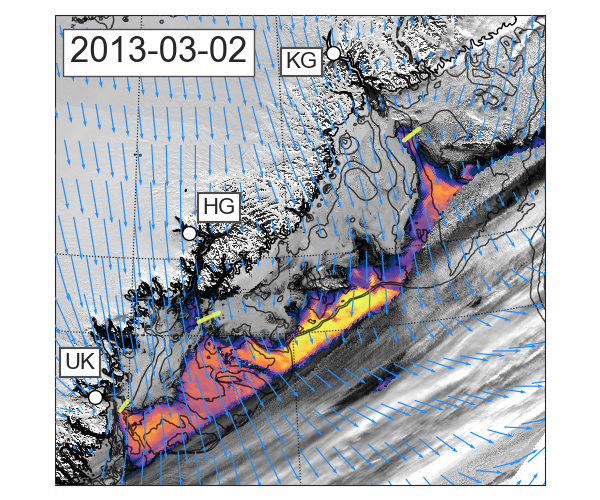

In [83]:
# # Plot REGIONAL visible, SST and winds together
# mdir = '/Volumes/Colossus/SST_Helheim_images/MOD09/'
# bdir = '/Volumes/Colossus/SST_Helheim_images/GHRSST_L2/'

# for m09file in m09files[8:9]: #2 has bad cloud over K, 11-worse,12-best before, 16 best intrusion, 8 or 18
#     m = 0
#     mod09 = SD(mdir+m09file, SDC.READ)
#     date = date_from_julian_date(m09file[7:14])
#     year = date.year
#     month = str(date.month).zfill(2)
#     day = str(date.day).zfill(2)
#     time = m09file[15:19]
#     print (f'{year}{month}{day}{time}')

# #         #Examine key of Level 3 outputs available
# #         print ('MODIS dataset key:')
# #         for key in mod09.datasets(): print (key)

#     B1 = mod09.select('250m Surface Reflectance Band 1')[:] #red
#     # R,G,B = mod09.select('500m Surface Reflectance Band 1')[:],mod09.select('500m Surface Reflectance Band 4')[:],mod09.select('500m Surface Reflectance Band 3')[:]
#     mlat, mlon = mod09.select('Latitude')[:], mod09.select('Longitude')[:]
#     mlat250,mlon250 = scipy.ndimage.zoom(mlat, 4, order=1),scipy.ndimage.zoom(mlon, 4, order=1)
#     # mlat500,mlon500 = scipy.ndimage.zoom(mlat, 2, order=1),scipy.ndimage.zoom(mlon, 2, order=1)
#     B1n = (255 * (B1 / B1.max())).astype(np.uint8)
#     # B4n = (255 * (B4 / B4.max())).astype(np.uint8)
#     # B3n = (255 * (B3 / B3.max())).astype(np.uint8)
#     B1f = (B1 / 16000.0)
#     # B4f = (B4 / 16000.0)
#     # B3f = (B3 / 16000.0)
#     # mesh_rgb = np.dstack([B1f,B4f,B3f]).astype(float)
#     # mesh_rgb[mesh_rgb<0] = 0

#     # p2, p98 = np.percentile(mesh_rgb[:,:,1], (2, 98))
#     p2, p98 = np.percentile(B1f, (2, 98))
#     img_rescale = exposure.rescale_intensity(B1f, in_range=(p2, p98))
#     for mfile in mfiles:
#         if mfile[0:12]==f'{year}{month}{day}{time}':
#             m = 1
#             print (mfile+str(mfile[0:12]==f'{year}{month}{day}{time}'))
#             file_sst = bdir + mfile 
#             sst = Dataset(file_sst, mode='r')
#             lat_sst = sst.variables['lat'][:]
#             lon_sst = sst.variables['lon'][:]
#             lat_indsb = np.where((lat_sst > latboundsb[0]) & (lat_sst < latboundsb[1]))
#             lon_indsb = np.where((lon_sst > lonboundsb[0]) & (lon_sst < lonboundsb[1]))
#             lats_sub = lat_sst[lat_indsb[0]] # subsetting lat lon so can sample later
#             lons_sub = lon_sst[lon_indsb[0]] # subsetting lat lon so can sample later
#             time_sst= sst.variables['time']

#             temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
#             temp_sst = np.where(temp_sst>=-1.5,temp_sst,np.nan) #2010-04 needs to be set to -1.3
#         #     qa_sst = sst.variables['quality_level'][0,:,:]
#             # temp_sst = np.where(qa_sst>=2,temp_sst,np.nan)
#         #     time_sstconv = pd.to_datetime(netCDF4.num2date(time_sst[:], time_sst.units, time_sst.calendar))
#             sst.close()
#             outfile = f'/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_regional{year}{month}{day}{time}{m09file[0:3]}-{mfile[46]}.jpg'
#             print (outfile)
#     if m==0:
#         print ('No SST match found')
#         continue
    
#     # Plot SST and MOD09
#     fig,ax = plt.subplots(figsize=(6,5)) 
#     plt.axis('off')

#     m = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-38))
#     m.set_extent([llcrnrlonB, urcrnrlonB, llcrnrlatB, urcrnrlatB], ccrs.PlateCarree())
#     m.coastlines(resolution='10m')
#     gl = m.gridlines(draw_labels=False,xlocs=[-45,-40,-35],ylocs=[65,66],y_inline=False,color='k',linestyle=':')
#     m.pcolormesh(mlon250,mlat250,img_rescale,transform=ccrs.PlateCarree(),cmap='gray',zorder=1)
#     data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=7.0,zorder=2)
# #     m.plot([-30.272,-30.859],[67.519,67.387],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)#
# #     m.plot([-37.265,-37.900],[65.301,65.180],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)
# #     m.plot([-40.018,-40.232],[64.135,64.007],color='#e8f959',linewidth=3,alpha=0.9,transform=ccrs.PlateCarree(),zorder=4)
#     m.scatter([-33.000,-38.200,-40.9997],[68.633,66.350,64.1673],facecolor='white',edgecolor='k',marker='o',s=100,transform=ccrs.PlateCarree(),zorder=4) #Kanger,Helheim,Umiiviip Kangertiva
    
# #     if m==1:
# #         data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=6.0,zorder=2)
# #     elif m==0:
# #         outfile = f'/Volumes/GoogleDrive/My Drive/User/Docs/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_compS1{year}{month}{day}{time}{m09file[0:3]}.jpg'
        
#     dt = pd.to_datetime(f'{year}{month}{day}{time}',format='%Y%m%d%H%M').to_datetime64()
#     idx = (np.abs(time_array - dt) / np.timedelta64(1, 'm')).argmin()
#     print (((time_array - dt)/ np.timedelta64(1, 'm'))[idx])
#     print (time_array[idx])
#     Q = m.quiver(x_W,y_W,windu_array[:,:,idx],windv_array[:,:,idx],edgecolors='k',facecolor='dodgerblue',headwidth=3,headlength=5,minlength=3,scale=150,transform=ccrs.PlateCarree(),zorder=3) #blue-4ECDC4,A9D3FF
#     qk = plt.quiverkey(Q,0.95,1.05,10,'10 m/s',labelpos='W') #, scale_units='meters'
#     plt.annotate(f'{year}-{month}-{day}',(-108.5,-73.0),xycoords='polar',xytext=(0.03,0.92),textcoords='axes fraction',fontsize=25,rotation=0,va='center',zorder=4,
#                 bbox=dict(fc='white',ec='0.3',boxstyle='square,pad=0.2'))
#     plt.annotate('KG',(-108.5,-73.0),xycoords='polar',xytext=(0.47,0.9),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
#                 bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
#     plt.annotate('HG',(-108.5,-73.0),xycoords='polar',xytext=(0.3,0.59),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
#                  bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
#     plt.annotate('UK',(-108.5,-73.0),xycoords='polar',xytext=(0.02,0.26),textcoords='axes fraction',fontsize=16,rotation=0,va='center',zorder=4,
#                  bbox=dict(fc='white',ec='0.3',lw=1.5,boxstyle='square,pad=0.2'))
#     cs = m.contour(x_b,y_b,bathy,[-500,-350,-250],colors='k',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=1.0,alpha=0.7,zorder=2)

# #             # Colorbar your face off
# #             cb = plt.colorbar(data,ticks=[-1,0,1,2,3,4,5,6],fraction=0.045,pad=0.03,orientation='horizontal')
# #             cb.ax.set_xticklabels(['-1','0','1','2','3','4','5','6'])
# #             cb.ax.set_yticklabels(cb.ax.get_yticklabels())
# #             cb.outline.set_edgecolor('k')
# #             cb.outline.set_linewidth(1)
# #             cb.ax.tick_params(color='k',size=5,labelsize=12)
# #             cb.set_label('Temperature [C]',rotation=0,fontsize=16,labelpad=5)

#     plt.tight_layout()
#     plt.savefig(outfile, format='jpg', dpi=500)
#     plt.show()

In [16]:
cd /Volumes/Colossus/SST_Helheim_images/GHRSST_L2

/Volumes/Colossus/SST_Helheim_images/GHRSST_L2


9.190002
201004161535T-D


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
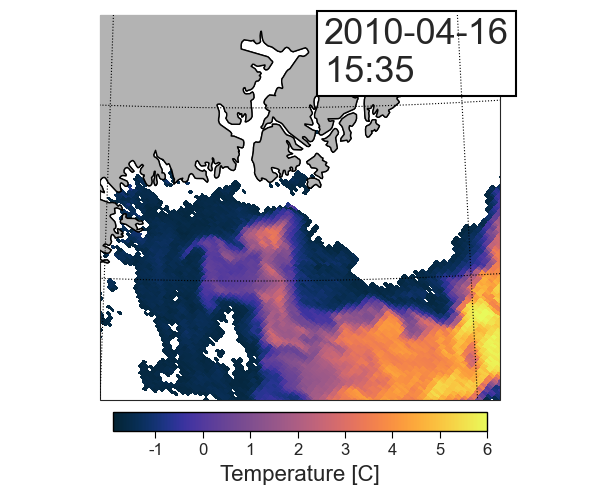

In [23]:
# MODIS L2 SST data
idx = 0

bdir = '/Volumes/Colossus/SST_Helheim_images/GHRSST_L2/'
mfiles = glob.glob('201*')
mfiles.sort()

for mfile in mfiles[:1]:
    file_sst = bdir + mfile 
    sst = Dataset(file_sst, mode='r')
    lat_sst = sst.variables['lat'][:]
    lon_sst = sst.variables['lon'][:]
    lat_indsb = np.where((lat_sst > latboundsb[0]) & (lat_sst < latboundsb[1]))
    lon_indsb = np.where((lon_sst > lonboundsb[0]) & (lon_sst < lonboundsb[1]))
    lats_sub = lat_sst[lat_indsb[0]] # subsetting lat lon so can sample later
    lons_sub = lon_sst[lon_indsb[0]] # subsetting lat lon so can sample later
    time_sst= sst.variables['time']

    temp_sst = sst.variables['sea_surface_temperature'][0,:,:]-273.15 #[:,lat_indsb[0],lon_indsb[0]]
    print (np.nanmax(temp_sst))
#     qa_sst = sst.variables['quality_level'][0,:,:]
    temp_sst = np.where(temp_sst>=-1.7,temp_sst,np.nan)
    # temp_sst = np.where(qa_sst>=2,temp_sst,np.nan)
#     time_sstconv = pd.to_datetime(netCDF4.num2date(time_sst[:], time_sst.units, time_sst.calendar))
    sst.close()
    
    fig,ax = plt.subplots(figsize=(6,5)) 
    plt.axis('off')

    m = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-38))
    m.set_extent([llcrnrlon2, urcrnrlon2, llcrnrlat2, urcrnrlat2], ccrs.PlateCarree())
    m.coastlines(resolution='10m')
    gl = m.gridlines(draw_labels=False,xlocs=[-45,-40,-35],ylocs=[65,66],y_inline=False,color='k',linestyle=':',zorder=6)
    landmask = cfeature.NaturalEarthFeature(category='physical', name='land',scale='10m', facecolor='0.7', edgecolor='k',linewidth=1,zorder=3)
    m.add_feature(landmask,zorder=3)
    # m.imshow(mesh_rgb,extent=img_extent,transform=ccrs.PlateCarree())
#     m.pcolormesh(mlon250,mlat250,img_rescale,transform=ccrs.PlateCarree(),cmap='gray',zorder=1)
    data = m.pcolormesh(lon_sst,lat_sst,temp_sst,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-1.9,vmax=6.0,zorder=1)
    
    dt = pd.to_datetime(mfile[0:12],format='%Y%m%d%H%M').to_datetime64()
    idx = (np.abs(time_array - dt) / np.timedelta64(1, 'm')).argmin()
    print (mfile[0:12]+mfile[44:47])
#     print (((time_array - dt)/ np.timedelta64(1, 'm'))[idx])
#     print (time_array[idx])
#     Q = m.quiver(x_W,y_W,windu_array[:,:,idx],windv_array[:,:,idx],edgecolors='k',facecolor='turquoise',headwidth=3,headlength=5,minlength=3,scale=100,transform=ccrs.PlateCarree()) # can put meanwindspd in 5 spot to color arrows
#     qk = plt.quiverkey(Q,0.95,1.05,5,'5 m/s',labelpos='W') #, scale_units='meters'
    
    plt.annotate(mfile[0:4]+'-'+mfile[4:6]+'-'+mfile[6:8]+'\n'+mfile[8:10]+':'+mfile[10:12],(-108.5,-73.0),xycoords='polar',xytext=(0.56,0.9),textcoords='axes fraction',fontsize=26,rotation=0,va='center',zorder=4,
                bbox=dict(fc='white',ec='k',lw=1.5,boxstyle='square,pad=0.2'))
    cs = m.contour(x_b,y_b,bathy,[-500,-250],colors='k',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=1.5,alpha=0.7)#linestyle='dotted',

    # Colorbar your face off
    cb = plt.colorbar(data,ticks=[-1,0,1,2,3,4,5,6],fraction=0.045,pad=0.03,orientation='horizontal')
    cb.ax.set_xticklabels(['-1','0','1','2','3','4','5','6'])
    cb.ax.set_yticklabels(cb.ax.get_yticklabels())
    cb.outline.set_edgecolor('k')
    cb.outline.set_linewidth(1)
    cb.ax.tick_params(color='k',size=5,labelsize=12)
    cb.set_label('Temperature [C]',rotation=0,fontsize=16,labelpad=5)

    plt.tight_layout()
    plt.savefig(f'/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/Figures/SST_timeseries/MODIS_SSTnarrow{mfile[0:12]}{mfile[44:47]}.jpg', format='jpg', dpi=500)
    plt.show()

In [11]:
# Open MOD29 file
MODfiles = glob('MOD09*')
mod07_1 = SD(MODfiles[0], SDC.READ)

#Examine key of Level 3 outputs available
print ('MODIS dataset key:')
for key in mod07_1.attributes(): print (key)

MODIS dataset key:
HDFEOSVersion
StructMetadata.0
HDFEOS_FractionalOffset_500m Data Lines_MODIS SWATH TYPE L2
HDFEOS_FractionalOffset_500m Data Samples_MODIS SWATH TYPE L2
HDFEOS_FractionalOffset_250m Data Lines_MODIS SWATH TYPE L2
HDFEOS_FractionalOffset_250m Data Samples_MODIS SWATH TYPE L2
Number of instrument scans
Number of scans with possible solar eclipse
Percentages of pixels in each State QA state
identifier_product_doi
identifier_product_doi_authority
CoreMetadata.0
ArchiveMetadata.0


# Mooring temp plots

# Winds, SSH, 